# IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler   # Feature scaling
from sklearn.preprocessing import RobustScaler                               # Outlizer

#ML classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree      import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

#Demension Reduction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

#Feature Selection
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif, SelectFpr

#Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

#Search for the best & Validation Curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, validation_curve

#score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, mean_absolute_error
# Curve
from sklearn.model_selection import learning_curve, validation_curve

# CV
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold

Mounted at /content/drive


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# load data chia bằng tay
df_smote_train = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/SZ_BD_D_smote_train.csv')
df_smote_test = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/SZ_BD_D_smote_test.csv')

X_train = df_smote_train.drop(['specific.disorder','Unnamed: 0'],axis=1);y_train = df_smote_train['specific.disorder']

X_test  = df_smote_test.drop(['specific.disorder','Unnamed: 0'],axis=1);y_test  = df_smote_test['specific.disorder']

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test]); y = pd.Series.to_numpy(y)

In [ ]:
# data mới làm lại
# load data chia bằng tay
df_smote_train = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/handeled the imbalance data/SMOTE SZ-BD-DD-HC/4classes_train.csv')
df_smote_test = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/handeled the imbalance data/SMOTE SZ-BD-DD-HC/4classes_test.csv')

X_train = df_smote_train.drop(['specific.disorder'],axis=1);y_train = df_smote_train['specific.disorder']

X_test  = df_smote_test.drop(['specific.disorder'],axis=1);y_test  = df_smote_test['specific.disorder']

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test]); y = pd.Series.to_numpy(y)

In [ ]:
y_df = pd.concat([y_train, y_test])
X_df = pd.concat([X_train, X_test])
df = pd.concat([X_df,y_df])

In [ ]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

# check Dimensional Reduction

In [ ]:
print("Orignal:",X_train.shape[1])

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("After PCA:",X_train_pca.shape[1])

vt = VarianceThreshold(threshold=95)
X_train_pca_vt = vt.fit_transform(X_train_pca)
X_test_pca_vt = vt.transform(X_test_pca)
print("After Variance Threshold:",X_train_pca_vt.shape[1])

Orignal: 1140
After PCA: 150
After Variance Threshold: 113


# BASE MODELS

In [ ]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(multi_class='multinomial') ))
    #basedModels.append(('LDA'  , LinearDiscriminantAnalysis() ))
    basedModels.append(('KNN'  , KNeighborsClassifier() ))
    basedModels.append(('DT'   , DecisionTreeClassifier() ))
    basedModels.append(('NB'   , GaussianNB() ))
    basedModels.append(('SVM'  , SVC(decision_function_shape='ovr') ))
    #basedModels.append(('AB'   , AdaBoostClassifier() ))
    basedModels.append(('GBM'  , GradientBoostingClassifier() ))
    basedModels.append(('RF'   , RandomForestClassifier() ))
    #basedModels.append(('ET'   , ExtraTreesClassifier() ))

    return basedModels

In [ ]:
basedModels = {'LR' : LogisticRegression(multi_class='multinomial'),
               'LDA': LinearDiscriminantAnalysis(),
               'KNN': KNeighborsClassifier(),
               'DT' : DecisionTreeClassifier(),
               'NB' : GaussianNB(),
               #'SVM': SVC(decision_function_shape='ovr'),
               #'AB' : AdaBoostClassifier(),
               'GB' : GradientBoostingClassifier(),
               'RF' : RandomForestClassifier(),
               #'ET' : ExtraTreesClassifier()
               }

In [ ]:
X_train = X_train.to_numpy()
X_train

# Function

In [ ]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}"

        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

class PlotBoxR(object):

    def __Trace(self,nameOfFeature,value):

        trace = go.Box(y=value,
                       name = nameOfFeature,
                       marker = dict( color = 'rgb(0, 128, 128)',)
                       )
        return trace

    def PlotResult(self,names,results):

        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))

        py.iplot(data)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def results_of_model(y_test,y_pred):
  results = {} # dict { metric:value, ...}

  results["accuracy"]           = accuracy_score(y_test,y_pred)
  results["f1_score"]           = f1_score(y_test, y_pred, average='macro')
  #results["f1_score_weighted"] = f1_score(y_test, y_pred, average='weighted')
  results["precision_score"]    = precision_score(y_test, y_pred, average='macro')
  #results['precision_score_weighted'] = precision_score(y_test, y_pred, average='weighted')
  results['recall_score']       = recall_score(y_test, y_pred, average='macro')
  #results['recall_score_weighted'] = recall_score(y_test, y_pred, average='weighted')

  confusion = confusion_matrix(y_pred,y_test)
  #results['recall for class 1'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[0]
  #results['recall for class 2'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[1]
  #results['recall for class 3'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[2]
  #results['precision for class 1'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[0]
  #results['precision for class 2'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[1]
  #results['precision for class 3'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[2]
  return results


def predictionReport(pipelines):
  acc_of_piplines = {} # empty dict to store the highest acc and the pipeline name pipe:acc
  results_of_piplines = {} #pipeline: [acc,precision,recall]
  i=0
  for pipeline_name, pipeline in pipelines.items():
        i=i+1

        # fit & predict
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)

        # save all results into a dict { name_of_pip : { 7 metrics : 7 values } }
        results_of_piplines[pipeline_name] = results_of_model(y_test,y_pred)

        # print classification_report
        #print(i,pipeline)
        #print(classification_report(y_test,y_pred))


  # save results_of_piplines as a dataframe
  results_df = pd.DataFrame.from_dict(results_of_piplines)
  results_df = results_df.T # or df1.transpose()
  print(results_df)

  return results_df

## results analysis

In [ ]:
# lib for ROC curve of MULTIPLE CLASS
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Function for FIT and PREDICTION -> y_test and y_proba
def fit_predict(pipeline):
  """ Train the model. Predict y_test and y_prob"""
  """ Input: Pipeline. Output: y_pred & y_prob (for auc)"""
  pipeline.fit(X_train,y_train)      # Fit
  y_pred = pipeline.predict(X_test)  # Predict
  y_pred_proba = pipeline.predict_proba(X_test) # Predict Probability
  return y_pred,y_pred_proba

def results_of_model2(y_test,y_pred):
  results = {} # dict { metric:value, ...}

  results["accuracy"]           = accuracy_score(y_test,y_pred)
  results["f1_score"]           = f1_score(y_test, y_pred, average='macro')
  #results["f1_score_weighted"] = f1_score(y_test, y_pred, average='weighted')
  results["precision_score"]    = precision_score(y_test, y_pred, average='macro')
  #results['precision_score_weighted'] = precision_score(y_test, y_pred, average='weighted')
  results['recall_score']       = recall_score(y_test, y_pred, average='macro')
  #results['recall_score_weighted'] = recall_score(y_test, y_pred, average='weighted')

  confusion = confusion_matrix(y_pred,y_test)
  results['recall for class 1'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[0]
  results['recall for class 2'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[1]
  results['recall for class 3'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[2]
  results['precision for class 1'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[0]
  results['precision for class 2'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[1]
  results['precision for class 3'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[2]
  return results

# Function for CONFUNSION MATRIX
## Function for calculate cf
def confunsion_matrix(y_pred):
  """ Calculate CF from y_pred and y_test """
  return confusion_matrix(y_test, y_pred)
## Function for plotting the calculated cf
def plotting_confunsion_matrix(cf_matrix):
  """ Plot the Confunsion matrix by SNS from the calculated CF.
      If use the plot_confusion_matrix function: we have to fit and predict again """
  df_df = pd.DataFrame(cf_matrix, range(3), range(3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
  plt.show()

def roc_auc_score_multiclass(y_pred, average = "macro"):
    actual_class = y_test; pred_class = y_pred
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:

        #creating a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict


# Plot the ROC CURVE
# using the lib
def plotting_roc_curve(y_pred_proba):
  skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                               figsize=(10,10),title_fontsize='medium')
  plt.show()

def combination_measurement(pipeline):
  # fit and predict -> y_pred,y_pred_proba
  y_pred,y_pred_proba = fit_predict(pipeline)

  # classification results
  print("Classification Results:")
  print(classification_report(y_test,y_pred))

  #
  results_df = results_of_model2(y_test,y_pred)
  print(results_df)

  # Confusion matrix
  cf_matrix = confunsion_matrix(y_pred)  # calculate Confusion matrix
  plotting_confunsion_matrix(cf_matrix)  # plot Confusion matrix

  # ROC AUC
  print("ROC AUC score")
  print(roc_auc_score_multiclass(y_pred, average = "macro")) # SCORE
  plotting_roc_curve(y_pred_proba)                    # Plotting

In [ ]:
def plotting_confunsion_matrix(cf_matrix):
  """ Plot the Confunsion matrix by SNS from the calculated CF.
      If use the plot_confusion_matrix function: we have to fit and predict again """
  df_df = pd.DataFrame(cf_matrix, range(3), range(3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
  plt.show()

In [ ]:
# Plot the LEARNING CURVE
from sklearn.model_selection import learning_curve

# USing the lib: have to fit again
def plot_learning_curve(pipeline):
  # calculate the Learning curve
  #X = pd.concat([X_train, X_test]); y = pd.concat([y_train, y_test])
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(pipeline, X_train, y_train, cv=5,return_times=True, n_jobs=-1)

  # Calculate training and test MEAN and STD
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title('Learning Curve')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
def measurement(pipeline):

  plot_learning_curve(pipeline)

  # fit and predict -> y_pred,y_pred_proba
  y_pred,y_pred_proba = fit_predict(pipeline)

  # classification results
  print("Classification Results:")
  print(classification_report(y_test,y_pred))


In [ ]:
def plot(acc_train,acc_test,mae_train,mae_test):
        fig, axs = plt.subplots(2)
        folds = np.arange(1, 5 + 1,1)

        axs[1].plot(mae_train, 'o-', color='green', label='train')         # Error curve
        axs[1].plot(mae_test, 'o-', color='red', label='test')
        #axs[1].legend()
        axs[1].set_xlabel('Fold')
        axs[1].set_ylabel('Mean Absolute Error')
        axs[1].grid()


        axs[0].plot(acc_train, 'o-', color='green', label='train')        # Accuracy Curve
        axs[0].plot(acc_test, 'o-', color='red', label='test')
        #axs[0].legend()
        axs[0].set_xlabel('Fold')
        axs[0].set_ylabel('Accuracy')
        axs[0].grid()

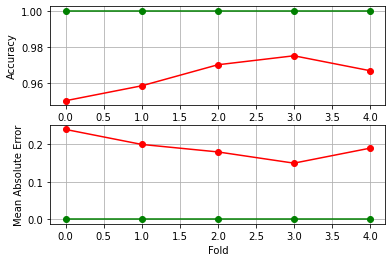

In [ ]:
plot(acc_train=[1.0,1.0,1.0,1.0,1.0],
     acc_test=[0.95,0.9583,0.97,0.9750,0.9667],
     mae_train=[0,0,0,0,0],
     mae_test=[0.24,0.2,0.18,0.15,0.19])

# hand making validation

In [ ]:
class Validation(object):
    def __init__(self,pipeline):
        self.pipeline = pipeline

    def FitAndPrediction(self,pipeline):
        mae_train,mae_test = [], []
        acc_train,acc_test = [],[]

        # Store y_test and y_pred of all k fold into list
        y_test_kfold = []
        y_test_pred_kfold,y_test_proba_kfold = [],[]

        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED) # split into k Folds

        for train_index, test_index in kf.split(X,y):

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]     # acess X, y
                y_train, y_test = y[train_index], y[test_index]

                print(X_train.shape[0],X_test.shape[0])
                unique, counts = np.unique(y_train, return_counts=True)
                print("DISTRIBUTION CHECKING:",dict(zip(unique, counts)))

                pipeline.fit(X_train, y_train)                       # fit

                y_train_pred = pipeline.predict(X_train)             # predict for Train set
                y_test_pred =  pipeline.predict(X_test)               # predict for Test set
                y_test_proba = pipeline.predict_proba(X_test)

                y_test_kfold.append(y_test)
                y_test_pred_kfold.append(y_test_pred);  y_test_proba_kfold.append(y_test_proba)

                mae_train.append(mean_absolute_error(y_train, y_train_pred))  # Error
                mae_test.append(mean_absolute_error(y_test, y_test_pred))

                acc_train.append(accuracy_score(y_train, y_train_pred))       # Accuracy
                acc_test.append(accuracy_score(y_test, y_test_pred))

        return y_test_kfold, y_test_pred_kfold,y_test_proba_kfold,acc_train,acc_test, mae_train, mae_test

    def PlotLearningAndErrorCurve(self,pipeline):
        _, _,_,acc_train,acc_test, mae_train, mae_test =self.FitAndPrediction(pipeline)
        fig, axs = plt.subplots(2)
        folds = np.arange(1, 5 + 1,1)

        axs[1].plot(mae_train, 'o-', color='green', label='train')         # Error curve
        axs[1].plot(mae_test, 'o-', color='red', label='test')
        axs[1].legend()
        axs[1].set_xlabel('Fold')
        axs[1].set_ylabel('Mean Absolute Error')
        axs[1].grid()


        axs[0].plot(acc_train, 'o-', color='green', label='train')        # Accuracy Curve
        axs[0].plot(acc_test, 'o-', color='red', label='test')
        axs[0].legend()
        axs[0].set_xlabel('Fold')
        axs[0].set_ylabel('Accuracy')
        axs[0].grid()

        plt.show()

    def PredictionPerformance(self,pipeline):
      y_test_kfold, y_test_pred_kfold,y_test_proba_kfold,_, _,_,_ =self.FitAndPrediction(pipeline)

      scores ={'precision':metrics.precision_score,
              'recall':metrics.recall_score,
              'f1':metrics.f1_score,}

      scores2 ={ 'accuracy':metrics.accuracy_score,
                'cf':metrics.multilabel_confusion_matrix,
                'MAE':metrics.mean_absolute_error}

      results_kfold = {}
      results = {}
      for i in np.arange(5):

        for score_name,score in scores.items():
          results_of_1metric = []
          result = score(y_test_pred_kfold[i],y_test_kfold[i],average=None)
          results_of_1metric.append(result)
          results[score_name]=results_of_1metric

        for score_name,score in scores2.items():
          results_of_1metric = []
          result = score(y_test_pred_kfold[i],y_test_kfold[i])
          results_of_1metric.append(result)
          results[score_name]=results_of_1metric

        results_kfold[i] = results

      results_kfold_df = pd.DataFrame(results_kfold).T
      return results_kfold_df

In [ ]:
def plot_validation_curve(classifier, param_name, param_range):

  train_scores,test_scores = validation_curve(#clf
                                              classifier,
                                              # feature matric & target vector
                                              X,y,
                                              #Hyper
                                              param_name=param_name, param_range=param_range,
                                              #fold, sorce, use all cores
                                              cv=5,scoring="accuracy",n_jobs=-1
                                              )

  #cal Mean & Std for Train & Test Score
  train_mean = np.mean(train_scores,axis=1); train_std = np.std(train_scores,axis=1)
  test_mean = np.mean(test_scores,axis=1);   test_std = np.std(test_scores,axis=1)

  #plot the Mean Acc
  plt.plot(param_range, train_mean, label="Training score", color="black")
  plt.plot(param_range, test_mean, label="Cross Val score", color="red")

  #plot acc bands
  plt.fill_between(param_range, train_mean- train_std, train_mean + train_std, color="gray")
  plt.fill_between(param_range, test_mean- test_std, test_mean + test_std, color="gray")

  #create plot
  plt.title(classifier)
  plt.xlabel(param_name)
  plt.ylabel("Accuracy")
  plt.legend()
  plt.tight_layout()
  plt.show()

## Fixing

In [ ]:
class Validation(object):
    def __init__(self,pipeline):
        self.pipeline = pipeline


    def FitAndPrediction(self):
        mae_train,mae_test = [], []
        acc_train,acc_test = [],[]

        # Store y_test and y_pred of all k fold into list
        y_test_kfold = []
        y_test_pred_kfold,y_test_proba_kfold = [],[]

        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED) # split into k Folds

        for train_index, test_index in kf.split(X,y):

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]     # acess X, y
                y_train, y_test = y[train_index], y[test_index]

                print(X_train.shape[0],X_test.shape[0])
                unique, counts = np.unique(y_train, return_counts=True)
                print("DISTRIBUTION CHECKING:",dict(zip(unique, counts)))

                pipeline = self.pipeline

                pipeline.fit(X_train, y_train)                       # fit

                y_train_pred = pipeline.predict(X_train)             # predict for Train set
                y_test_pred =  pipeline.predict(X_test)               # predict for Test set
                y_test_proba = pipeline.predict_proba(X_test)

                y_test_kfold.append(y_test)
                y_test_pred_kfold.append(y_test_pred);  y_test_proba_kfold.append(y_test_proba)

                mae_train.append(mean_absolute_error(y_train, y_train_pred))  # Error
                mae_test.append(mean_absolute_error(y_test, y_test_pred))

                acc_train.append(accuracy_score(y_train, y_train_pred))       # Accuracy
                acc_test.append(accuracy_score(y_test, y_test_pred))

        #return y_test_kfold, y_test_pred_kfold,y_test_proba_kfold,acc_train,acc_test, mae_train, mae_test

    #def PlotLearningAndErrorCurve(self):
        #_, _,_,acc_train,acc_test, mae_train, mae_test =self.FitAndPrediction()
        fig, axs = plt.subplots(2)
        folds = np.arange(1, 5 + 1,1)
        fig.tight_layout()

        axs[1].plot(mae_train, 'o-', color='green', label='train')         # Error curve
        axs[1].plot(mae_test, 'o-', color='red', label='test')
        axs[1].legend()
        axs[1].set_xlabel('Fold', fontsize=12)
        axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
        axs[1].grid(True,axis='both')


        axs[0].plot(acc_train, 'o-', color='green', label='train')        # Accuracy Curve
        axs[0].plot(acc_test, 'o-', color='red', label='test')
        axs[0].legend()
        axs[0].set_xlabel('Fold', fontsize=12)
        axs[0].set_ylabel('Accuracy', fontsize=12)
        axs[0].grid(True,axis='both')

        plt.show()

    #def PredictionPerformance(self):
        #y_test_kfold, y_test_pred_kfold,y_test_proba_kfold,_, _,_,_ =self.FitAndPrediction()

        scores ={'precision':metrics.precision_score,
              'recall':metrics.recall_score,
              'f1':metrics.f1_score,}

        scores2 ={ 'accuracy':metrics.accuracy_score,
                'cf':metrics.multilabel_confusion_matrix,
                'MAE':metrics.mean_absolute_error}

        results_kfold = {}
        results = {}
        for i in np.arange(5):

          for score_name,score in scores.items():
            results_of_1metric = []
            result = score(y_test_pred_kfold[i],y_test_kfold[i],average=None)
            results_of_1metric.append(result)
            results[score_name]=results_of_1metric

          for score_name,score in scores2.items():
            results_of_1metric = []
            result = score(y_test_pred_kfold[i],y_test_kfold[i])
            results_of_1metric.append(result)
            results[score_name]=results_of_1metric

          results_kfold[i] = results

        results_kfold_df = pd.DataFrame(results_kfold).T
        print(results_kfold_df)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 5
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds,random_state=SEED,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    return names, results

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

LR: 0.707505 (0.027403)
LDA: 0.671235 (0.052512)
KNN: 0.606853 (0.039780)
DT: 0.558280 (0.043709)
NB: 0.421395 (0.020483)
SVM: 0.537623 (0.040732)
AB: 0.471641 (0.044699)
GBM: 0.732788 (0.036186)
RF: 0.734313 (0.031696)
ET: 0.783059 (0.018500)


In [ ]:
PlotBoxR().PlotResult(names,results)
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    LR  0.7075
1   LDA  0.6712
2   KNN  0.6069
3    DT  0.5583
4    NB  0.4214
5   SVM  0.5376
6    AB  0.4716
7   GBM  0.7328
8    RF  0.7343
9    ET  0.7831

# Feature Engineering: 1. Data Preprocessing

In [ ]:
# Make Pipeline

def GetScaledModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression(multi_class='multinomial', solver='lbfgs'))])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('DT', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC(decision_function_shape='ovr'))])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))

    return pipelines

## Standard

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

standardLR: 0.749951 (0.025024)
standardLDA: 0.671235 (0.052512)
standardKNN: 0.600615 (0.039769)
standardCART: 0.570792 (0.027790)
standardNB: 0.421395 (0.020483)
standardSVM: 0.716954 (0.032104)
standardAB: 0.471641 (0.044699)
standardGBM: 0.740637 (0.037003)
standardRF: 0.765748 (0.016423)
standardET: 0.770411 (0.021640)


Model   Score         Model   Score
0    LR  0.7075    standardLR  0.7500
1   LDA  0.6712   standardLDA  0.6712
2   KNN  0.6069   standardKNN  0.6006
3    DT  0.5583  standardCART  0.5708
4    NB  0.4214    standardNB  0.4214
5   SVM  0.5376   standardSVM  0.7170
6    AB  0.4716    standardAB  0.4716
7   GBM  0.7328   standardGBM  0.7406
8    RF  0.7343    standardRF  0.7657
9    ET  0.7831    standardET  0.7704

## MinMax

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

minmaxLR: 0.715391 (0.009654)
minmaxLDA: 0.671235 (0.052512)
minmaxKNN: 0.584818 (0.054982)
minmaxCART: 0.577116 (0.038116)
minmaxNB: 0.421395 (0.020483)
minmaxSVM: 0.608415 (0.033198)
minmaxAB: 0.471641 (0.044699)
minmaxGBM: 0.754761 (0.028777)
minmaxRF: 0.751612 (0.027593)
minmaxET: 0.760999 (0.038804)


Model   Score         Model   Score       Model   Score
0    LR  0.7075    standardLR  0.7500    minmaxLR  0.7154
1   LDA  0.6712   standardLDA  0.6712   minmaxLDA  0.6712
2   KNN  0.6069   standardKNN  0.6006   minmaxKNN  0.5848
3    DT  0.5583  standardCART  0.5708  minmaxCART  0.5771
4    NB  0.4214    standardNB  0.4214    minmaxNB  0.4214
5   SVM  0.5376   standardSVM  0.7170   minmaxSVM  0.6084
6    AB  0.4716    standardAB  0.4716    minmaxAB  0.4716
7   GBM  0.7328   standardGBM  0.7406   minmaxGBM  0.7548
8    RF  0.7343    standardRF  0.7657    minmaxRF  0.7516
9    ET  0.7831    standardET  0.7704    minmaxET  0.7610

# Baseline models

In [ ]:
all_piplines={}
for classifier_name, classifier in basedModels.items():

      pipeline_name = classifier_name

      all_piplines[pipeline_name] = classifier

      results_df = predictionReport(pipelines=all_piplines)

results_df.to_excel('A Complete ML Pipeline Tutorial.xlsx')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

LR


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Results:
              precision    recall  f1-score   support

           1       0.64      0.90      0.75        40
           2       0.83      0.38      0.52        40
           3       0.87      1.00      0.93        40

    accuracy                           0.76       120
   macro avg       0.78      0.76      0.73       120
weighted avg       0.78      0.76      0.73       120

{'accuracy': 0.7583333333333333, 'f1_score': 0.7324913124832931, 'precision_score': 0.7819185645272602, 'recall_score': 0.7583333333333333, 'recall for class 1': 0.9, 'recall for class 2': 0.375, 'recall for class 3': 1.0, 'precision for class 1': 0.6428571428571429, 'precision for class 2': 0.8333333333333334, 'precision for class 3': 0.8695652173913043}


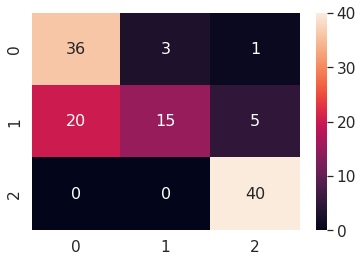

ROC AUC score
{1: 0.825, 2: 0.6687500000000001, 3: 0.9625}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


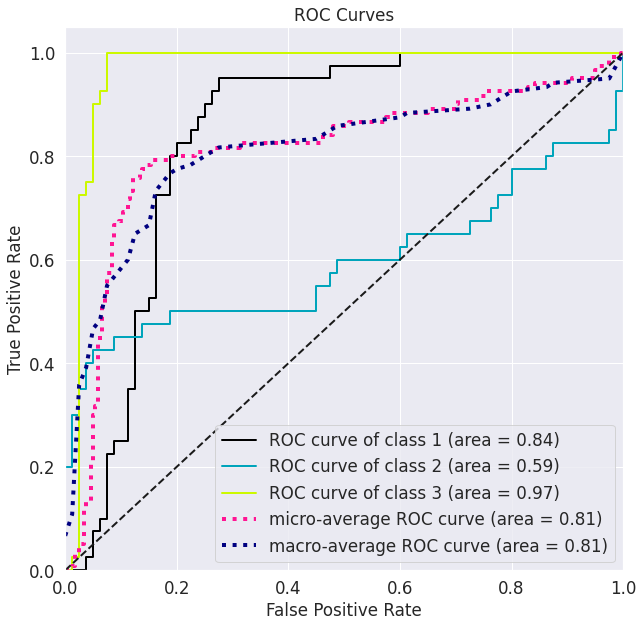

LDA
Classification Results:
              precision    recall  f1-score   support

           1       0.70      0.95      0.81        40
           2       0.94      0.38      0.54        40
           3       0.80      1.00      0.89        40

    accuracy                           0.78       120
   macro avg       0.81      0.78      0.74       120
weighted avg       0.81      0.78      0.74       120

{'accuracy': 0.775, 'f1_score': 0.7443712709670156, 'precision_score': 0.8137345679012347, 'recall_score': 0.775, 'recall for class 1': 0.95, 'recall for class 2': 0.375, 'recall for class 3': 1.0, 'precision for class 1': 0.7037037037037037, 'precision for class 2': 0.9375, 'precision for class 3': 0.8}


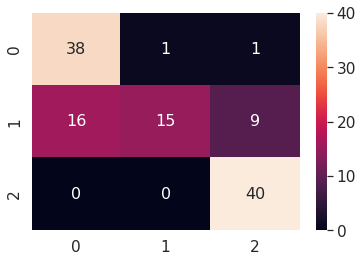

ROC AUC score
{1: 0.875, 2: 0.68125, 3: 0.9375}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


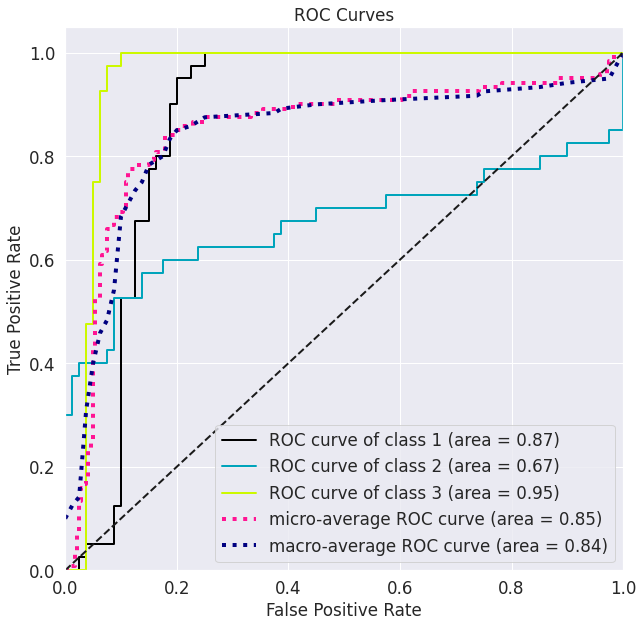

KNN
Classification Results:
              precision    recall  f1-score   support

           1       0.74      0.78      0.76        40
           2       0.75      0.15      0.25        40
           3       0.57      1.00      0.73        40

    accuracy                           0.64       120
   macro avg       0.69      0.64      0.58       120
weighted avg       0.69      0.64      0.58       120

{'accuracy': 0.6416666666666667, 'f1_score': 0.577790096082779, 'precision_score': 0.6865079365079364, 'recall_score': 0.6416666666666667, 'recall for class 1': 0.775, 'recall for class 2': 0.15, 'recall for class 3': 1.0, 'precision for class 1': 0.7380952380952381, 'precision for class 2': 0.75, 'precision for class 3': 0.5714285714285714}


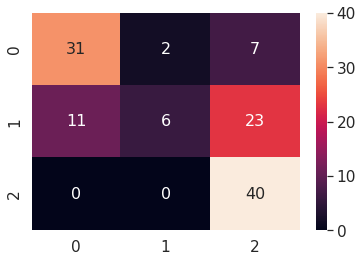

ROC AUC score
{1: 0.8187500000000001, 2: 0.5624999999999999, 3: 0.8125}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


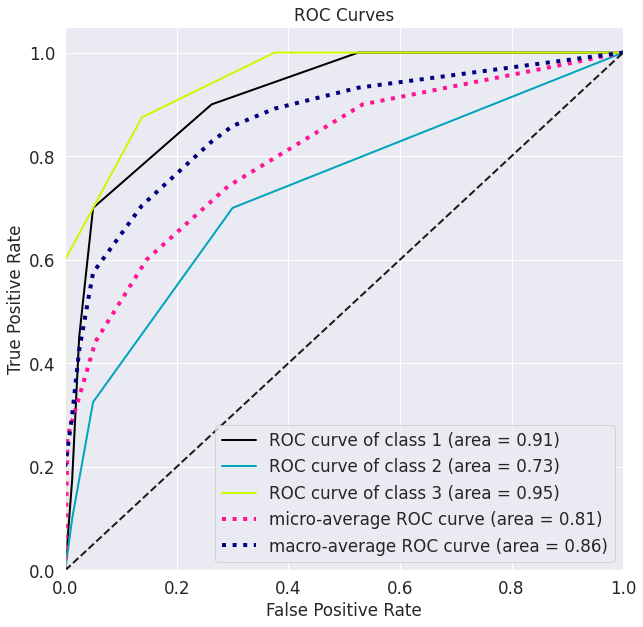

DT
Classification Results:
              precision    recall  f1-score   support

           1       0.54      0.72      0.62        40
           2       0.58      0.45      0.51        40
           3       0.83      0.72      0.77        40

    accuracy                           0.63       120
   macro avg       0.65      0.63      0.63       120
weighted avg       0.65      0.63      0.63       120

{'accuracy': 0.6333333333333333, 'f1_score': 0.6324656211500682, 'precision_score': 0.6487512089662628, 'recall_score': 0.6333333333333333, 'recall for class 1': 0.725, 'recall for class 2': 0.45, 'recall for class 3': 0.725, 'precision for class 1': 0.5370370370370371, 'precision for class 2': 0.5806451612903226, 'precision for class 3': 0.8285714285714286}


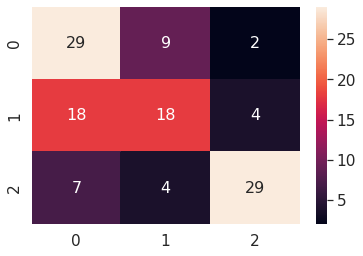

ROC AUC score
{1: 0.70625, 2: 0.64375, 3: 0.8250000000000001}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


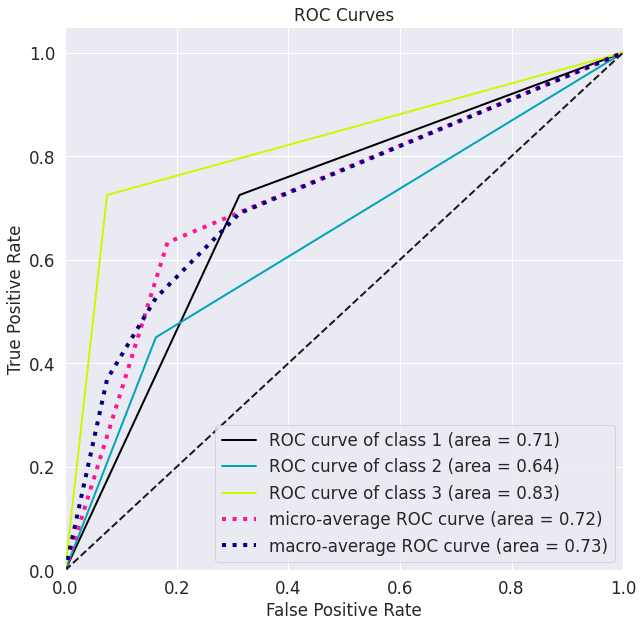

NB
Classification Results:
              precision    recall  f1-score   support

           1       0.36      0.20      0.26        40
           2       0.29      0.35      0.31        40
           3       0.41      0.50      0.45        40

    accuracy                           0.35       120
   macro avg       0.35      0.35      0.34       120
weighted avg       0.35      0.35      0.34       120

{'accuracy': 0.35, 'f1_score': 0.3407031533164189, 'precision_score': 0.3525046382189239, 'recall_score': 0.35000000000000003, 'recall for class 1': 0.2, 'recall for class 2': 0.35, 'recall for class 3': 0.5, 'precision for class 1': 0.36363636363636365, 'precision for class 2': 0.2857142857142857, 'precision for class 3': 0.40816326530612246}


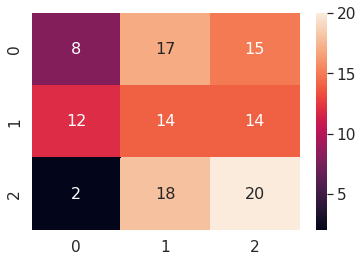

ROC AUC score
{1: 0.5125, 2: 0.45625, 3: 0.56875}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


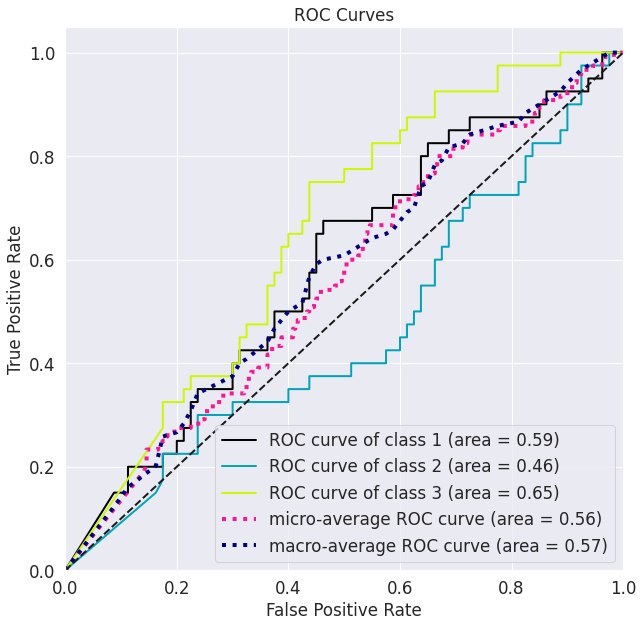

GB
Classification Results:
              precision    recall  f1-score   support

           1       0.70      0.95      0.81        40
           2       0.90      0.47      0.62        40
           3       0.84      0.95      0.89        40

    accuracy                           0.79       120
   macro avg       0.82      0.79      0.78       120
weighted avg       0.82      0.79      0.78       120

{'accuracy': 0.7916666666666666, 'f1_score': 0.7751930350096089, 'precision_score': 0.817636684303351, 'recall_score': 0.7916666666666666, 'recall for class 1': 0.95, 'recall for class 2': 0.475, 'recall for class 3': 0.95, 'precision for class 1': 0.7037037037037037, 'precision for class 2': 0.9047619047619048, 'precision for class 3': 0.8444444444444444}


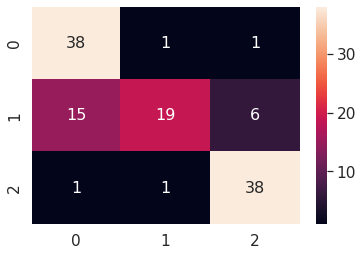

ROC AUC score
{1: 0.875, 2: 0.7250000000000001, 3: 0.9312499999999999}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


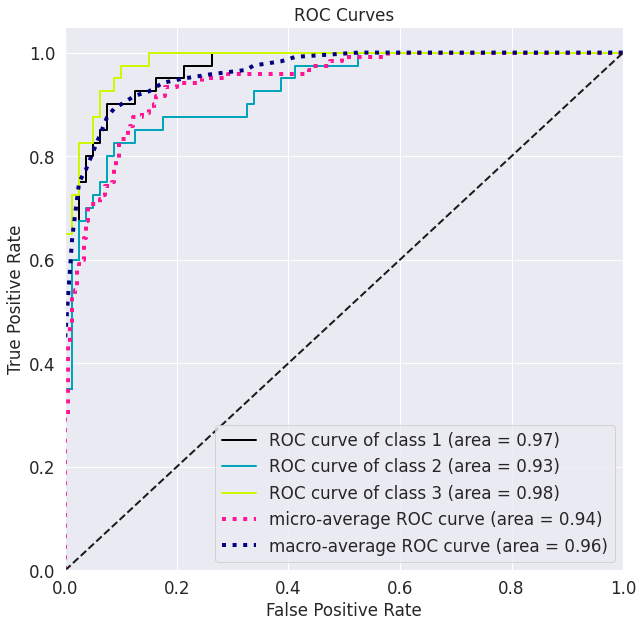

RF
Classification Results:
              precision    recall  f1-score   support

           1       0.66      0.97      0.79        40
           2       0.89      0.40      0.55        40
           3       0.86      0.93      0.89        40

    accuracy                           0.77       120
   macro avg       0.80      0.77      0.74       120
weighted avg       0.80      0.77      0.74       120

{'accuracy': 0.7666666666666667, 'f1_score': 0.7437230636233544, 'precision_score': 0.8034569847735004, 'recall_score': 0.7666666666666666, 'recall for class 1': 0.975, 'recall for class 2': 0.4, 'recall for class 3': 0.925, 'precision for class 1': 0.6610169491525424, 'precision for class 2': 0.8888888888888888, 'precision for class 3': 0.8604651162790697}


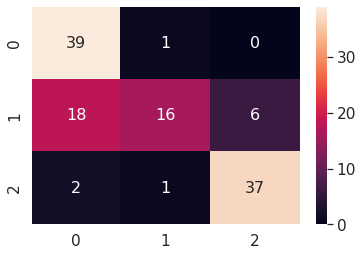

ROC AUC score
{1: 0.8625, 2: 0.6875, 3: 0.925}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


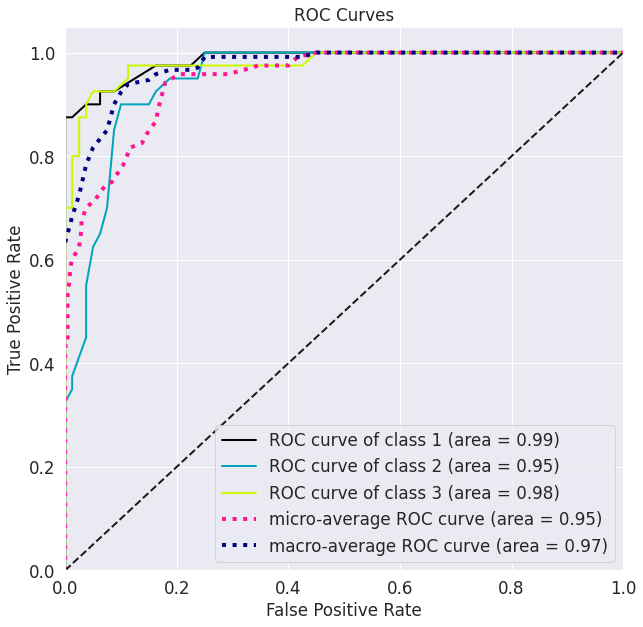

In [ ]:
for classifier_name, classifier in basedModels.items():
  print(classifier_name)
  combination_measurement(pipeline=classifier)

# Dimensional reduction

In [ ]:
# Feature Extraction
FE_dict =  {"pca":PCA(n_components=0.99),
            "ica":FastICA(n_components=200),
            "lle":LocallyLinearEmbedding(n_components=200)}

# Feature Selection
FS_dict =  {'vt':VarianceThreshold(threshold=80),
            'sp':SelectPercentile(f_classif,percentile=80),
            #'fpr':SelectFpr(alpha=0.05)
            }

# Dictionary of Processors pipeline
std_FE_FS = {}
for FE_name, FE_algo in FE_dict.items():
  for FS_name, FS_algo in FS_dict.items():
    proprecsor = FeatureUnion([("std",StandardScaler()),
                               (FE_name,FE_algo),
                               (FS_name, FS_algo)
                               ])

    proprecsor_name = "std" + '_' + FE_name + '_' + FS_name

    std_FE_FS[proprecsor_name] = proprecsor

print(len(std_FE_FS))

6


In [ ]:
all_piplines={}
for classifier_name, classifier in basedModels.items():
  for processor_name, processor in std_FE_FS.items():
      pipeline = Pipeline(steps=[(processor_name, processor),
                                (classifier_name,classifier)])

      pipeline_name = processor_name + '_' + classifier_name

      all_piplines[pipeline_name] = pipeline

  results_df = predictionReport(pipelines=all_piplines)

results_df.to_excel('A Complete ML Pipeline Tutorial.xlsx')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

               accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR  0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR  0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR  0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR  0.758333  0.725780         0.775014      0.758333
std_lle_vt_LR  0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR  0.733333  0.695080         0.753061      0.733333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.758333  0.730280         0.777006      0.758333
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.758333  0.725780         0.775014      0.758333
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333
std_pca_vt_KNN  0.650000  0.592806         0.701768      0.650000
std_pca_sp_KNN  0.666667  0.606364         0.708264      0.666667
std_ica_vt

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.758333  0.725780         0.775014      0.758333
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333
std_pca_vt_KNN  0.650000  0.592806         0.701768      0.650000
std_pca_sp_KNN  0.666667  0.606364         0.708264      0.666667
std_ica_vt

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.758333  0.725780         0.775014      0.758333
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333
std_pca_vt_KNN  0.650000  0.592806         0.701768      0.650000
std_pca_sp_KNN  0.666667  0.606364         0.708264      0.666667
std_ica_vt

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.750000  0.718846         0.769586      0.750000
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333
std_pca_vt_KNN  0.650000  0.592806         0.701768      0.650000
std_pca_sp_KNN  0.666667  0.606364         0.708264      0.666667
std_ica_vt

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.758333  0.726422         0.776530      0.758333
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333
std_pca_vt_KNN  0.650000  0.592806         0.701768      0.650000
std_pca_sp_KNN  0.666667  0.606364         0.708264      0.666667
std_ica_vt

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_LR   0.750000  0.719066         0.782738      0.750000
std_pca_sp_LR   0.783333  0.747379         0.839360      0.783333
std_ica_vt_LR   0.741667  0.713491         0.767645      0.741667
std_ica_sp_LR   0.758333  0.730280         0.777006      0.758333
std_lle_vt_LR   0.741667  0.715494         0.753215      0.741667
std_lle_sp_LR   0.733333  0.695080         0.753061      0.733333
std_pca_vt_LDA  0.766667  0.736845         0.806642      0.766667
std_pca_sp_LDA  0.766667  0.732660         0.808081      0.766667
std_ica_vt_LDA  0.775000  0.744371         0.813735      0.775000
std_ica_sp_LDA  0.783333  0.751881         0.820972      0.783333
std_lle_vt_LDA  0.700000  0.615792         0.740541      0.700000
std_lle_sp_LDA  0.733333  0.713333         0.755556      0.733333
std_pca_vt_KNN  0.650000  0.592806         0.701768      0.650000
std_pca_sp_KNN  0.666667  0.606364         0.708264      0.666667
std_ica_vt

In [ ]:
all_piplines={}
for classifier_name, classifier in basedModels.items():

      pipeline_name = classifier_name

      all_piplines[pipeline_name] = classifier

      results_df = predictionReport(pipelines=all_piplines)

results_df.to_excel('A Complete ML Pipeline Tutorial.xlsx')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    accuracy  f1_score  precision_score  recall_score
LR  0.758333  0.732491         0.781919      0.758333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000
KNN  0.641667  0.577790         0.686508      0.641667


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000
KNN  0.641667  0.577790         0.686508      0.641667
DT   0.608333  0.591519         0.600934      0.608333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000
KNN  0.641667  0.577790         0.686508      0.641667
DT   0.608333  0.599974         0.613757      0.608333
NB   0.350000  0.340703         0.352505      0.350000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000
KNN  0.641667  0.577790         0.686508      0.641667
DT   0.575000  0.566337         0.568778      0.575000
NB   0.350000  0.340703         0.352505      0.350000
SVM  0.583333  0.550874         0.593389      0.583333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000
KNN  0.641667  0.577790         0.686508      0.641667
DT   0.608333  0.600959         0.608216      0.608333
NB   0.350000  0.340703         0.352505      0.350000
SVM  0.583333  0.550874         0.593389      0.583333
GB   0.808333  0.793214         0.839683      0.808333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     accuracy  f1_score  precision_score  recall_score
LR   0.758333  0.732491         0.781919      0.758333
LDA  0.775000  0.744371         0.813735      0.775000
KNN  0.641667  0.577790         0.686508      0.641667
DT   0.608333  0.606643         0.618958      0.608333
NB   0.350000  0.340703         0.352505      0.350000
SVM  0.583333  0.550874         0.593389      0.583333
GB   0.783333  0.764706         0.811785      0.783333
RF   0.800000  0.785514         0.834625      0.800000


In [ ]:
def DimensionalReductionModel(basedModel,nameOfModel):

    pipelines = []

    for processor_name,processor in std_FE_FS.items():
        pipline = Pipeline(steps=[('preprocess', processor),('classifier',basedModel)])

        pipelines.append((processor_name + '_' + nameOfModel  ,
                          Pipeline([ ('preprocess', processor),('classifier',basedModel)
                          ])
                          ))

    return pipelines

for nameOfModel,model in basedModels.items():
  models = DimensionalReductionModel(basedModel=model, nameOfModel=nameOfModel)

  names, results = BasedLine2(X_train, y_train,models)

  PlotBoxR().PlotResult(names,results)
  scaledScoreStandard = ScoreDataFrame(names,results)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_pca_vt_LR: 0.685507 (0.028446)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_pca_sp_LR: 0.682357 (0.033535)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_pca_fpr_LR: 0.685531 (0.025895)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_ica_vt_LR: 0.693381 (0.037044)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_ica_sp_LR: 0.688656 (0.024955)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_ica_fpr_LR: 0.672958 (0.037437)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_lle_vt_LR: 0.690207 (0.035768)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_lle_sp_LR: 0.694943 (0.030273)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_lle_fpr_LR: 0.674520 (0.038177)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



std_pca_vt_LDA: 0.672810 (0.048880)
std_pca_sp_LDA: 0.671260 (0.044507)
std_pca_fpr_LDA: 0.668110 (0.049793)
std_ica_vt_LDA: 0.666523 (0.050143)
std_ica_sp_LDA: 0.672822 (0.051559)
std_ica_fpr_LDA: 0.672859 (0.045818)
std_lle_vt_LDA: 0.647749 (0.047154)
std_lle_sp_LDA: 0.643036 (0.056728)
std_lle_fpr_LDA: 0.647785 (0.041583)


std_pca_vt_KNN: 0.603703 (0.042417)
std_pca_sp_KNN: 0.600578 (0.041321)
std_pca_fpr_KNN: 0.599003 (0.036772)
std_ica_vt_KNN: 0.597416 (0.039628)
std_ica_sp_KNN: 0.591117 (0.041429)
std_ica_fpr_KNN: 0.609978 (0.043943)
std_lle_vt_KNN: 0.597416 (0.039628)
std_lle_sp_KNN: 0.591117 (0.041429)
std_lle_fpr_KNN: 0.609978 (0.043943)


std_pca_vt_DT: 0.559781 (0.046902)
std_pca_sp_DT: 0.551993 (0.040904)
std_pca_fpr_DT: 0.564518 (0.049181)
std_ica_vt_DT: 0.558132 (0.031017)
std_ica_sp_DT: 0.553433 (0.045709)
std_ica_fpr_DT: 0.559769 (0.059380)
std_lle_vt_DT: 0.577079 (0.037616)
std_lle_sp_DT: 0.572355 (0.024660)
std_lle_fpr_DT: 0.564505 (0.025889)


std_pca_vt_NB: 0.437168 (0.036082)
std_pca_sp_NB: 0.415133 (0.023651)
std_pca_fpr_NB: 0.429281 (0.036839)
std_ica_vt_NB: 0.603666 (0.039964)
std_ica_sp_NB: 0.614739 (0.018719)
std_ica_fpr_NB: 0.608440 (0.021021)
std_lle_vt_NB: 0.487414 (0.027550)
std_lle_sp_NB: 0.493750 (0.028521)
std_lle_fpr_NB: 0.495325 (0.037761)


std_pca_vt_SVM: 0.520312 (0.047518)
std_pca_sp_SVM: 0.518738 (0.046856)
std_pca_fpr_SVM: 0.526612 (0.044299)
std_ica_vt_SVM: 0.471580 (0.043314)
std_ica_sp_SVM: 0.462156 (0.039094)
std_ica_fpr_SVM: 0.451144 (0.043893)
std_lle_vt_SVM: 0.471580 (0.043314)
std_lle_sp_SVM: 0.462156 (0.039094)
std_lle_fpr_SVM: 0.451144 (0.043893)


std_pca_vt_AB: 0.493615 (0.053861)
std_pca_sp_AB: 0.493615 (0.053861)
std_pca_fpr_AB: 0.493615 (0.053861)
std_ica_vt_AB: 0.477953 (0.040427)
std_ica_sp_AB: 0.485753 (0.042849)
std_ica_fpr_AB: 0.485851 (0.042954)
std_lle_vt_AB: 0.520497 (0.049432)
std_lle_sp_AB: 0.520497 (0.049432)
std_lle_fpr_AB: 0.520497 (0.049432)


std_pca_vt_GB: 0.750037 (0.016179)
std_pca_sp_GB: 0.751599 (0.014077)
std_pca_fpr_GB: 0.764222 (0.034266)
std_ica_vt_GB: 0.743738 (0.041058)
std_ica_sp_GB: 0.751649 (0.039444)
std_ica_fpr_GB: 0.776796 (0.031942)
std_lle_vt_GB: 0.701267 (0.017770)
std_lle_sp_GB: 0.702817 (0.019710)
std_lle_fpr_GB: 0.699692 (0.015100)


std_pca_vt_RF: 0.771986 (0.024619)
std_pca_sp_RF: 0.775098 (0.040297)
std_pca_fpr_RF: 0.753150 (0.018947)
std_ica_vt_RF: 0.775098 (0.023610)
std_ica_sp_RF: 0.776722 (0.022661)
std_ica_fpr_RF: 0.786159 (0.021396)
std_lle_vt_RF: 0.742138 (0.013524)
std_lle_sp_RF: 0.759510 (0.028945)
std_lle_fpr_RF: 0.762525 (0.026478)


std_pca_vt_ET: 0.787721 (0.019428)
std_pca_sp_ET: 0.784572 (0.014857)
std_pca_fpr_ET: 0.794008 (0.026186)
std_ica_vt_ET: 0.779872 (0.022831)
std_ica_sp_ET: 0.789296 (0.015413)
std_ica_fpr_ET: 0.803457 (0.014953)
std_lle_vt_ET: 0.776722 (0.012897)
std_lle_sp_ET: 0.783034 (0.010331)
std_lle_fpr_ET: 0.790846 (0.023936)


# 2.1. Analyze Data: 2.3.1 Outliers investigation

In [ ]:
def OutLiersBox(df,nameOfFeature):

    trace0 = go.Box( y = df[nameOfFeature],
                    name = "All Points",
                    jitter = 0.3,
                    pointpos = -1.8,
                    boxpoints = 'all',
                    marker = dict( color = 'rgb(7,40,89)'),
                    line = dict( color = 'rgb(7,40,89)')
                     )

    trace1 = go.Box(y = df[nameOfFeature],
                    name = "Only Whiskers",
                    boxpoints = False,
                    marker = dict(color = 'rgb(9,56,125)'),
                    line = dict(color = 'rgb(9,56,125)')
                    )

    trace2 = go.Box(y = df[nameOfFeature],
                    name = "Suspected Outliers",
                    boxpoints = 'suspectedoutliers',
                    marker = dict(color = 'rgb(8,81,156)',
                                  outliercolor = 'rgba(219, 64, 82, 0.6)',
                                  line = dict(outliercolor = 'rgba(219, 64, 82, 0.6)',
                                              outlierwidth = 2)
                                  ),
                    line = dict( color = 'rgb(8,81,156)')
                    )

    trace3 = go.Box( y = df[nameOfFeature],
                    name = "Whiskers and Outliers",
                    boxpoints = 'outliers',
                    marker = dict(color = 'rgb(107,174,214)'),
                    line = dict(color = 'rgb(107,174,214)')
                    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [ ]:
df_name=df.columns

In [ ]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

# Feature Engninnering: 2. Remove Outliers

In [ ]:
df_t = df.copy()
df_t_name = df_t.columns

In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else:
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [ ]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1194 and outliers: [13.533164  7.970252  8.269064 ...       nan       nan       nan]
New dataset with removed outliers has 0 samples with 1141 features each.


In [ ]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

IndexError: ignored

# 5. Algortithm Tuning

In [ ]:
class RandomSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 5
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 error_score='raise'
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
class GridSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 5
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                           error_score='raise'
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
from scipy.stats import uniform

def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_sc = mm.fit_transform(X_train)
X_test_sc  = mm.transform(X_test)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std  = std.transform(X_test)

# 5.1.Logistic Regression

In [ ]:
# model
model = LogisticRegression(multi_class='multinomial')

# Create hyperparameter options

penalty = [ 'l2', 'none'] # regularization penalty space
# Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

# Solver
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
solver = [ 'newton-cg','sag', 'saga', 'lbfgs'] #Solver 'newton-cg','sag','lbfgs' supports only 'l2' or 'none'

# C
C = uniform(loc=0, scale=4) # Create regularization hyperparameter distribution using uniform distribution

hyperparameters = dict(penalty=penalty,solver=solver) # C = C

LR_RandSearch = RandomSearch(X_train_std,y_train,model,hyperparameters)

# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_std)

print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LR).mean(),7))

y_test_array = y_test.to_numpy()
print(classification_report(Prediction_LR,y_test_array))

TypeError: ignored

In [ ]:
lr = LogisticRegression(multi_class='multinomial',C=2.7776006309109804, penalty= 'l2', solver= 'newton-cg')
std_lr = Pipeline(steps
                  = [('preprocess',FeatureUnion(transformer_list=[#('vt', VarianceThreshold()),
                                                                      ('sdt', StandardScaler()),
                  ])),
                         ('classifier', lr)])


lr_validation = Validation(std_lr)
lr_validation.PlotLearningAndErrorCurve(std_lr)
lr_validation.PredictionPerformance(std_lr)

No fine tuned

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Results:
              precision    recall  f1-score   support

           1       0.69      0.93      0.79        40
           2       0.82      0.35      0.49        40
           3       0.82      1.00      0.90        40

    accuracy                           0.76       120
   macro avg       0.78      0.76      0.73       120
weighted avg       0.78      0.76      0.73       120

{'accuracy': 0.7583333333333333, 'f1_score': 0.725779505741004, 'precision_score': 0.7750137091873787, 'recall_score': 0.7583333333333333, 'recall for class 1': 0.6851851851851852, 'recall for class 2': 0.8235294117647058, 'recall for class 3': 0.8163265306122449, 'precision for class 1': 0.925, 'precision for class 2': 0.35, 'precision for class 3': 1.0}


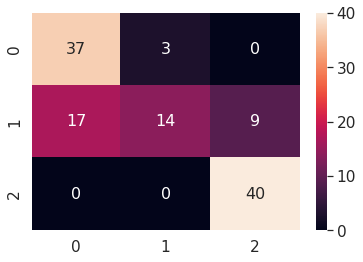

ROC AUC score
{1: 0.85625, 2: 0.6562500000000001, 3: 0.94375}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


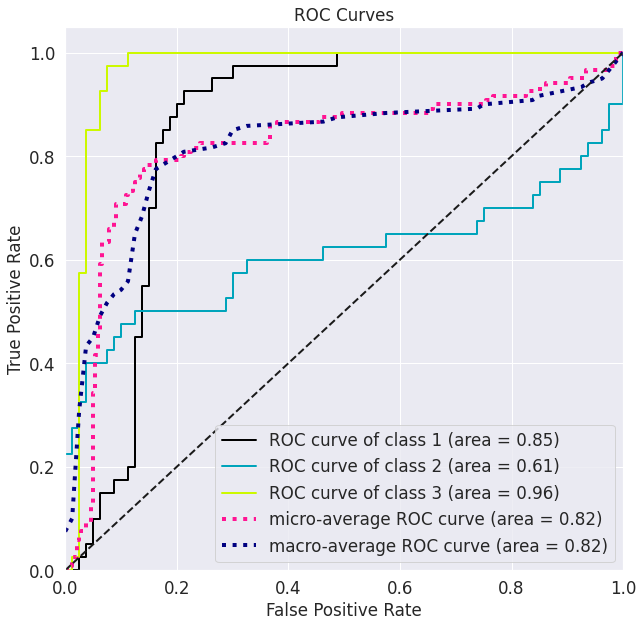

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


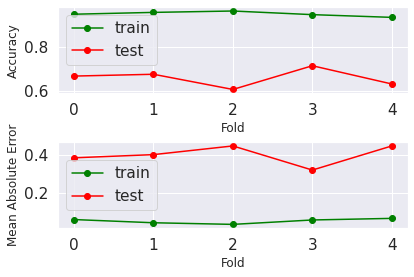

                            precision  \
0  [[0.5641025641025641, 0.525, 0.8]]   
1  [[0.5641025641025641, 0.525, 0.8]]   
2  [[0.5641025641025641, 0.525, 0.8]]   
3  [[0.5641025641025641, 0.525, 0.8]]   
4  [[0.5641025641025641, 0.525, 0.8]]   

                                              recall  \
0  [[0.5789473684210527, 0.5675675675675675, 0.72...   
1  [[0.5789473684210527, 0.5675675675675675, 0.72...   
2  [[0.5789473684210527, 0.5675675675675675, 0.72...   
3  [[0.5789473684210527, 0.5675675675675675, 0.72...   
4  [[0.5789473684210527, 0.5675675675675675, 0.72...   

                                                  f1              accuracy  \
0  [[0.5714285714285715, 0.5454545454545455, 0.76...  [0.6302521008403361]   
1  [[0.5714285714285715, 0.5454545454545455, 0.76...  [0.6302521008403361]   
2  [[0.5714285714285715, 0.5454545454545455, 0.76...  [0.6302521008403361]   
3  [[0.5714285714285715, 0.5454545454545455, 0.76...  [0.6302521008403361]   
4  [[0.5714285714285715, 0

In [ ]:
# PCA_ANOVA_LR
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', FastICA(n_components=200)),
                                                ('vt',SelectPercentile(f_classif,percentile=80))
                                                ])),
                ('classifier',
                 LogisticRegression())])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Results:
              precision    recall  f1-score   support

           1       0.70      0.93      0.80        40
           2       0.83      0.38      0.52        40
           3       0.82      1.00      0.90        40

    accuracy                           0.77       120
   macro avg       0.78      0.77      0.74       120
weighted avg       0.78      0.77      0.74       120

{'accuracy': 0.7666666666666667, 'f1_score': 0.7372722361786366, 'precision_score': 0.7825910238309159, 'recall_score': 0.7666666666666666, 'recall for class 1': 0.6981132075471698, 'recall for class 2': 0.8333333333333334, 'recall for class 3': 0.8163265306122449, 'precision for class 1': 0.925, 'precision for class 2': 0.375, 'precision for class 3': 1.0}


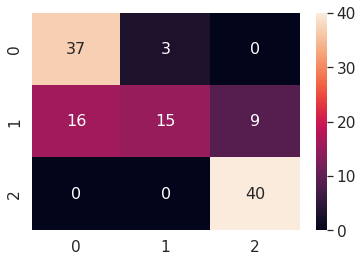

ROC AUC score
{1: 0.8625, 2: 0.6687500000000001, 3: 0.94375}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


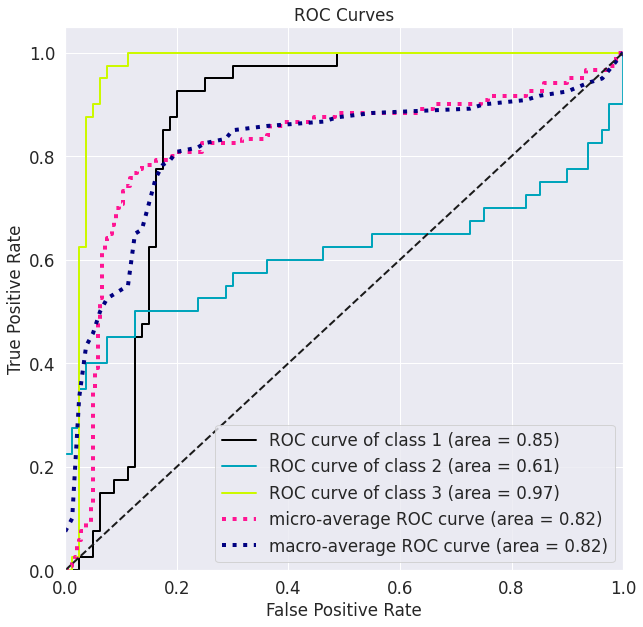

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


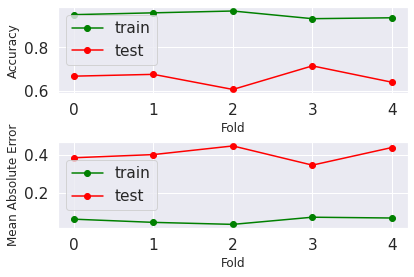

                            precision  \
0  [[0.5897435897435898, 0.525, 0.8]]   
1  [[0.5897435897435898, 0.525, 0.8]]   
2  [[0.5897435897435898, 0.525, 0.8]]   
3  [[0.5897435897435898, 0.525, 0.8]]   
4  [[0.5897435897435898, 0.525, 0.8]]   

                                              recall  \
0  [[0.5897435897435898, 0.5833333333333334, 0.72...   
1  [[0.5897435897435898, 0.5833333333333334, 0.72...   
2  [[0.5897435897435898, 0.5833333333333334, 0.72...   
3  [[0.5897435897435898, 0.5833333333333334, 0.72...   
4  [[0.5897435897435898, 0.5833333333333334, 0.72...   

                                                  f1              accuracy  \
0  [[0.5897435897435898, 0.5526315789473685, 0.76...  [0.6386554621848739]   
1  [[0.5897435897435898, 0.5526315789473685, 0.76...  [0.6386554621848739]   
2  [[0.5897435897435898, 0.5526315789473685, 0.76...  [0.6386554621848739]   
3  [[0.5897435897435898, 0.5526315789473685, 0.76...  [0.6386554621848739]   
4  [[0.5897435897435898, 0

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', FastICA(n_components=200)),
                                                ('vt',SelectPercentile(f_classif,percentile=80))
                                                ])),
                ('classifier',LogisticRegression(multi_class='multinomial'))])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()

## LR + Dimensional Reduction

In [ ]:
lr = LogisticRegression(multi_class='multinomial')
models = DimensionalReductionModel(basedModel=lr, nameOfModel='lr')
print(len(models))
names, results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)

9


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_pca_vt_lr: 0.685507 (0.028446)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_pca_sp_lr: 0.682357 (0.033535)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_pca_fpr_lr: 0.685531 (0.025895)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_ica_vt_lr: 0.693381 (0.037044)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_ica_sp_lr: 0.688656 (0.024955)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_ica_fpr_lr: 0.672958 (0.037437)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_lle_vt_lr: 0.690207 (0.035768)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_lle_sp_lr: 0.694943 (0.030273)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

std_lle_fpr_lr: 0.674520 (0.038177)


# 5.2. KNN

In [ ]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

weights = ['uniform', 'distance']

metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(n_neighbors=neighbors, weights=weights,metric=metric)

KNN_GridSearch = GridSearch(X_train_sc,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)

print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_KNN).mean(),7))
print(classification_report(Prediction_KNN,y_test_array))

Best: 0.627193 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
prediction on test set is: 0.7666667
              precision    recall  f1-score   support

           1       1.00      0.78      0.88        51
           2       0.30      1.00      0.46        12
           3       1.00      0.70      0.82        57

    accuracy                           0.77       120
   macro avg       0.77      0.83      0.72       120
weighted avg       0.93      0.77      0.81       120



In [ ]:
knn = KNeighborsClassifier()
KNN_GridSearch = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
cross_validate(KNN_GridSearch, X, y, scoring=['accuracy','precision_macro','recall_macro','f1_macro'])

{'fit_time': array([22.03657246, 19.51278806, 20.07763934, 23.76968193, 20.48550463]),
 'score_time': array([0.07114482, 0.0740633 , 0.08039498, 0.06939411, 0.02065682]),
 'test_accuracy': array([0.6       , 0.61666667, 0.67226891, 0.75630252, 0.76470588]),
 'test_precision_macro': array([0.59761905, 0.59586145, 0.66417678, 0.8230009 , 0.82552993]),
 'test_recall_macro': array([0.6       , 0.61666667, 0.675     , 0.75213675, 0.76666667]),
 'test_f1_macro': array([0.54883363, 0.56456807, 0.62511324, 0.70057055, 0.72014279])}

## with Dimension

In [ ]:
for n_neighbor in [1,5,10,15]:
    model_KNN = KNeighborsClassifier(n_neighbors = n_neighbor,
                                    weights = 'uniform',
                                    metric = 'manhattan' )

    model_KNN.fit(X_train,y_train)

    print(classification_report(model_KNN.predict(X_test),
                                y_test))

              precision    recall  f1-score   support

           1       1.00      0.74      0.85        54
           2       0.30      1.00      0.46        12
           3       1.00      0.74      0.85        54

    accuracy                           0.77       120
   macro avg       0.77      0.83      0.72       120
weighted avg       0.93      0.77      0.81       120

              precision    recall  f1-score   support

           1       0.70      0.78      0.74        36
           2       0.28      0.85      0.42        13
           3       1.00      0.56      0.72        71

    accuracy                           0.66       120
   macro avg       0.66      0.73      0.62       120
weighted avg       0.83      0.66      0.69       120

              precision    recall  f1-score   support

           1       0.65      0.72      0.68        36
           2       0.15      0.75      0.25         8
           3       0.93      0.49      0.64        76

    accuracy        

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 1,
                                    weights = 'uniform',
                                    metric = 'manhattan' )

KNN_piplines={}
for processor_name, processor in std_FE_FS.items():
      pipeline = Pipeline(steps=[(processor_name, processor),
                                ("KNN",model_KNN)])

      pipeline_name = processor_name + '_' + 'KNN'

      KNN_piplines[pipeline_name] = pipeline

results_df = predictionReport(pipelines=KNN_piplines)

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_KNN  0.766667  0.721286          0.82733      0.766667
std_pca_sp_KNN  0.766667  0.721286          0.82733      0.766667
std_ica_vt_KNN  0.766667  0.721286          0.82733      0.766667
std_ica_sp_KNN  0.766667  0.721286          0.82733      0.766667
std_lle_vt_KNN  0.766667  0.721286          0.82733      0.766667
std_lle_sp_KNN  0.766667  0.721286          0.82733      0.766667


In [ ]:
KNN = KNeighborsClassifier()
pipeline  = Pipeline(steps=[('processor', std_FE_FS['std_pca_vt']),
                            ('classifier',KNN)])
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'processor', 'classifier', 'processor__n_jobs', 'processor__transformer_list', 'processor__transformer_weights', 'processor__verbose', 'processor__std', 'processor__pca', 'processor__vt', 'processor__std__copy', 'processor__std__with_mean', 'processor__std__with_std', 'processor__pca__copy', 'processor__pca__iterated_power', 'processor__pca__n_components', 'processor__pca__random_state', 'processor__pca__svd_solver', 'processor__pca__tol', 'processor__pca__whiten', 'processor__vt__threshold', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])

In [ ]:
# choose one of the best pipeline to tuning classifier again

KNN = KNeighborsClassifier()
pipeline  = Pipeline(steps=[('processor', std_FE_FS['std_pca_vt']),
                            ('classifier',KNN)])

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

weights = ['uniform', 'distance']

metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(classifier__n_neighbors=neighbors, classifier__weights=weights, classifier__metric=metric)


GridSearch = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

GridSearch.fit(X_train,y_train)

# Best hyper
print(GridSearch.best_estimator_)

# Predict & Its results
GridSearch_predictions = GridSearch.predict(X_test)
print(confusion_matrix(y_test,GridSearch_predictions))
print(classification_report(y_test,GridSearch_predictions))#Output

Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.99)),
                                                ('vt',
                                                 VarianceThreshold(threshold=80))])),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])
[[40  0  0]
 [14 13 13]
 [ 0  0 40]]
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        40
           2       1.00      0.33      0.49        40
           3       0.75      1.00      0.86        40

    accuracy                           0.78       120
   macro avg       0.83      0.78      0.73       120
weighted avg       0.83      0.78      0.73       120



477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


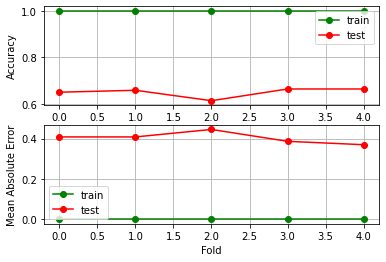

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


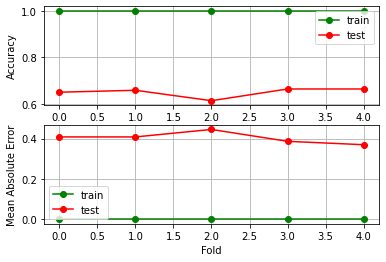

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


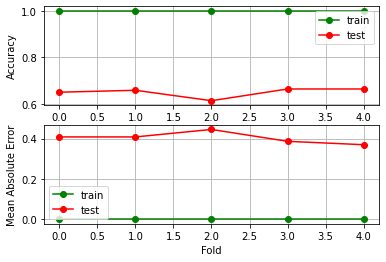

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


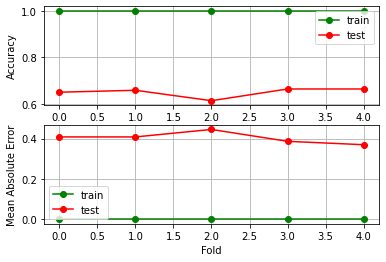

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


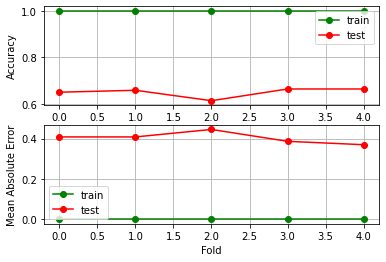

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


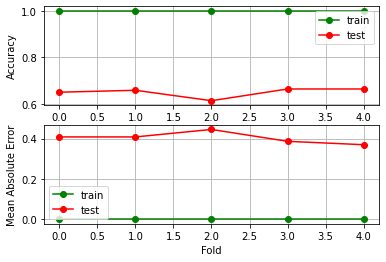

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


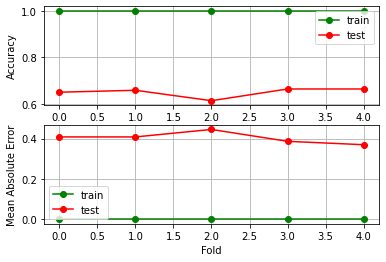

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


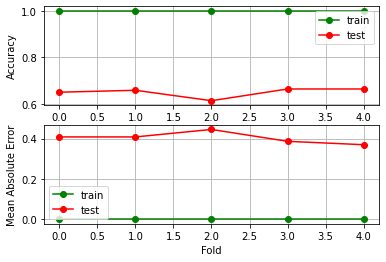

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


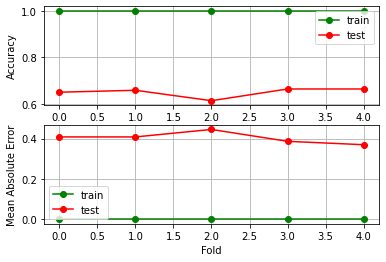

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


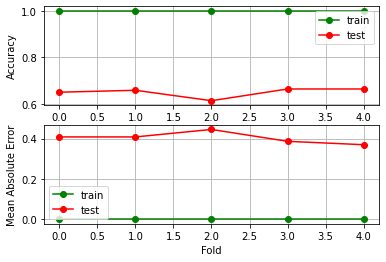

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}


KeyboardInterrupt: ignored

In [ ]:
std_ica_sp_GB  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                #('pca', PCA(n_components=0.99)),
                                                #('vt',VarianceThreshold(threshold=80))
                                                ])),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])

ica_sp_GB_validation = Validation(std_ica_sp_GB)
ica_sp_GB_validation.FitAndPrediction()

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


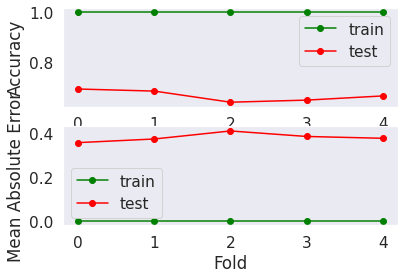

In [ ]:
std_ica_sp_GB  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.99)),
                                                ('vt',
                                                 VarianceThreshold(threshold=80))])),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])

ica_sp_GB_validation = Validation(std_ica_sp_GB)
ica_sp_GB_validation.PlotLearningAndErrorCurve(std_ica_sp_GB)

Classification Results:
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        40
           2       1.00      0.30      0.46        40
           3       0.70      1.00      0.82        40

    accuracy                           0.77       120
   macro avg       0.83      0.77      0.72       120
weighted avg       0.83      0.77      0.72       120

{'accuracy': 0.7666666666666667, 'f1_score': 0.721800536233526, 'precision_score': 0.8286893704850361, 'recall_score': 0.7666666666666666, 'recall for class 1': 0.7843137254901961, 'recall for class 2': 1.0, 'recall for class 3': 0.7017543859649122, 'precision for class 1': 1.0, 'precision for class 2': 0.3, 'precision for class 3': 1.0}


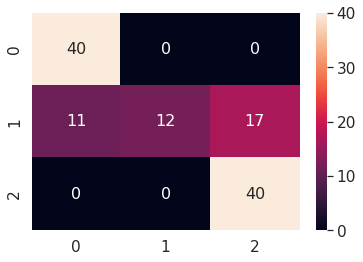

ROC AUC score
{1: 0.93125, 2: 0.65, 3: 0.8937499999999999}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


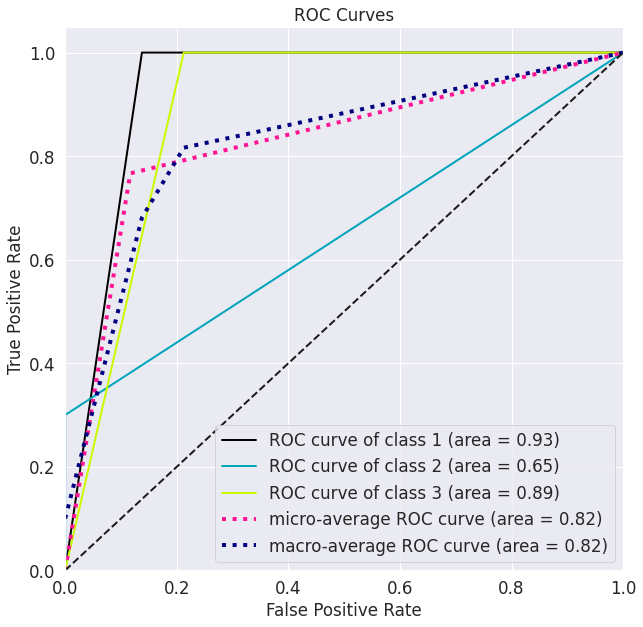

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                #('pca', PCA(n_components=0.99)),
                                                #('vt',VarianceThreshold(threshold=80))
                                                ])),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])

combination_measurement(pipeline = pca_vt_knn)

# 5.6. SVM

In [ ]:
SVM = SVC(decision_function_shape='ovo')

# Hyper dict
param_grid = {'C': [0.1, 0.5, 1, 3, 5, 7, 10, 50, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# GridSearch
grid = GridSearchCV(SVM, param_grid, verbose=-1)

grid.fit(X_train,y_train)

# Best hyper
print(grid.best_estimator_)

# Predict & Its results
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
[[40  0  0]
 [21 14  5]
 [ 0  0 40]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79        40
           2       1.00      0.35      0.52        40
           3       0.89      1.00      0.94        40

    accuracy                           0.78       120
   macro avg       0.85      0.78      0.75       120
weighted avg       0.85      0.78      0.75       120



In [ ]:
SVM = SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly',probability=True)

combination_measurement(pipeline = SVM)

Classification Results:
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        40
           2       1.00      0.40      0.57        40
           3       0.89      1.00      0.94        40

    accuracy                           0.80       120
   macro avg       0.86      0.80      0.77       120
weighted avg       0.86      0.80      0.77       120

{'accuracy': 0.8, 'f1_score': 0.7735619500325382, 'precision_score': 0.8556183301946013, 'recall_score': 0.7999999999999999, 'recall for class 1': 0.6779661016949152, 'recall for class 2': 1.0, 'recall for class 3': 0.8888888888888888, 'precision for class 1': 1.0, 'precision for class 2': 0.4, 'precision for class 3': 1.0}


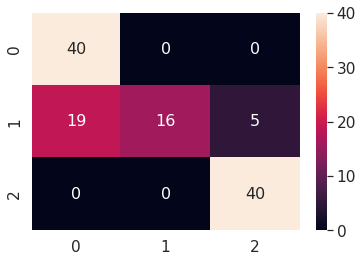

ROC AUC score
{1: 0.88125, 2: 0.7, 3: 0.96875}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


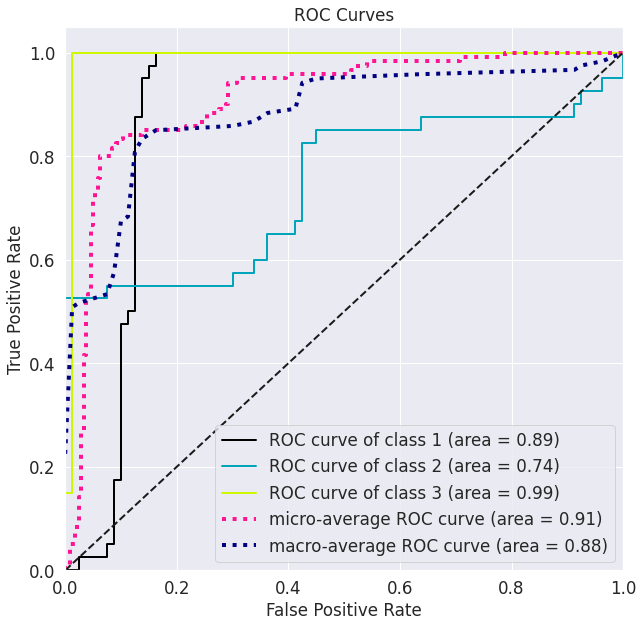

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                #('pca', PCA(n_components=0.99)),
                                                ('vt',VarianceThreshold(threshold=75))
                                                ])),
                ('classifier',SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly',probability=True))])

combination_measurement(pipeline = pca_vt_knn)

## With Dimensional Redunction

In [ ]:
SVM = SVC(decision_function_shape='ovo',
          C=0.1,
          gamma=1,
          kernel='poly')

SVM_piplines={}
for processor_name, processor in std_FE_FS.items():
      pipeline = Pipeline(steps=[(processor_name, processor),
                                ("SVM", SVM)])

      pipeline_name = processor_name + '_' + 'SVM'

      SVM_piplines[pipeline_name] = pipeline

results_df = predictionReport(pipelines=SVM_piplines)

                accuracy  f1_score  precision_score  recall_score
std_pca_vt_SVM  0.791667  0.761256         0.849177      0.791667
std_pca_sp_SVM  0.800000  0.771904         0.850939      0.800000
std_ica_vt_SVM  0.791667  0.762210         0.851852      0.791667
std_ica_sp_SVM  0.783333  0.750591         0.848209      0.783333
std_lle_vt_SVM  0.791667  0.762210         0.851852      0.791667
std_lle_sp_SVM  0.783333  0.750591         0.848209      0.783333


In [ ]:
# choose one of the best pipeline to tuning classifier again

SVM = SVC(decision_function_shape='ovo')
pipeline  = Pipeline(steps=[('processor', std_FE_FS['std_pca_sp']),
                            ('classifier',SVM)])

# Hyper dict
param_grid = {'classifier__C': [0.1, 0.5, 1, 3, 5, 7, 10, 50, 100],
              'classifier__gamma': [1,0.1,0.01,0.001],
              'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

GridSearch = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

GridSearch.fit(X_train,y_train)

# Best hyper
print(GridSearch.best_estimator_)

# Predict & Its results
GridSearch_predictions = GridSearch.predict(X_test)
print(confusion_matrix(y_test,GridSearch_predictions))
print(classification_report(y_test,GridSearch_predictions))#Output

Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.99)),
                                                ('sp',
                                                 SelectPercentile(percentile=80))])),
                ('classifier',
                 SVC(C=0.1, decision_function_shape='ovo', gamma=1,
                     kernel='poly'))])
[[40  0  0]
 [17 16  7]
 [ 0  0 40]]
              precision    recall  f1-score   support

           1       0.70      1.00      0.82        40
           2       1.00      0.40      0.57        40
           3       0.85      1.00      0.92        40

    accuracy                           0.80       120
   macro avg       0.85      0.80      0.77       120
weighted avg       0.85      0.80      0.77       120



Classification Results:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82        40
           2       1.00      0.40      0.57        40
           3       0.85      1.00      0.92        40

    accuracy                           0.80       120
   macro avg       0.85      0.80      0.77       120
weighted avg       0.85      0.80      0.77       120

{'accuracy': 0.8, 'f1_score': 0.7719036897849554, 'precision_score': 0.8509394052507154, 'recall_score': 0.7999999999999999, 'recall for class 1': 0.7017543859649122, 'recall for class 2': 1.0, 'recall for class 3': 0.851063829787234, 'precision for class 1': 1.0, 'precision for class 2': 0.4, 'precision for class 3': 1.0}


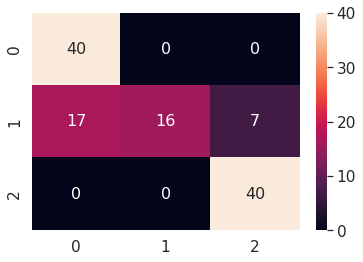

ROC AUC score
{1: 0.8937499999999999, 2: 0.7, 3: 0.9562499999999999}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



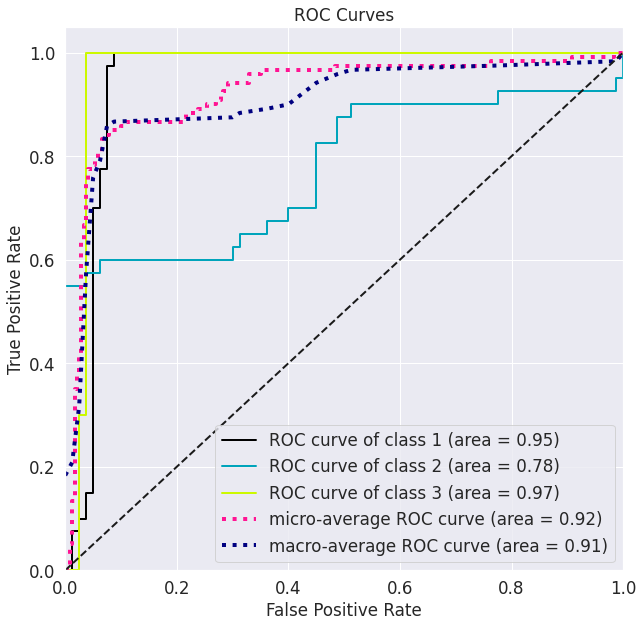

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


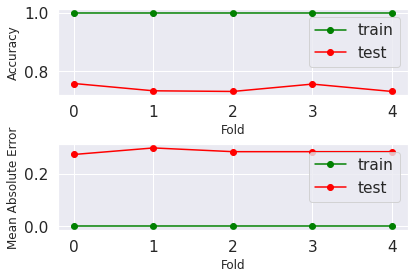

                            precision  \
0  [[0.7692307692307693, 0.6, 0.825]]   
1  [[0.7692307692307693, 0.6, 0.825]]   
2  [[0.7692307692307693, 0.6, 0.825]]   
3  [[0.7692307692307693, 0.6, 0.825]]   
4  [[0.7692307692307693, 0.6, 0.825]]   

                                              recall  \
0  [[0.7142857142857143, 0.631578947368421, 0.846...   
1  [[0.7142857142857143, 0.631578947368421, 0.846...   
2  [[0.7142857142857143, 0.631578947368421, 0.846...   
3  [[0.7142857142857143, 0.631578947368421, 0.846...   
4  [[0.7142857142857143, 0.631578947368421, 0.846...   

                                                  f1              accuracy  \
0  [[0.7407407407407408, 0.6153846153846154, 0.83...  [0.7310924369747899]   
1  [[0.7407407407407408, 0.6153846153846154, 0.83...  [0.7310924369747899]   
2  [[0.7407407407407408, 0.6153846153846154, 0.83...  [0.7310924369747899]   
3  [[0.7407407407407408, 0.6153846153846154, 0.83...  [0.7310924369747899]   
4  [[0.7407407407407408, 0

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.99)),
                                                ('sp',
                                                 SelectPercentile(percentile=80))])),
                ('classifier',
                 SVC(C=0.1, decision_function_shape='ovo', gamma=1,
                     kernel='poly', probability=True))])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()
#ica_sp_GB_validation.PlotLearningAndErrorCurve( pca_vt_knn)

# 5.3. Decision Tree

In [ ]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
from scipy.stats import randint

max_depth_value = np.arange(1,100,4)
#max_features_value =  np.arange(0.1,1,0.1)
#min_samples_leaf_value = np.arange(0.1,0.5,0.1) # min_samples_leaf must be at least 1 or in (0, 0.5]
#min_samples_split_value = np.arange(0.1,1,0.1)
criterion_value = ["gini", "entropy"]

param_grid = dict(max_depth = max_depth_value,
                  #max_features = max_features_value,
                  #min_samples_leaf = min_samples_leaf_value,
                  #min_samples_split = min_samples_split_value,
                  criterion =  ["gini", "entropy"]
                  )

dt = DecisionTreeClassifier()

DT_GridSearch = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)

DT_GridSearch.fit(X_train,y_train)

# Best hyper
print(DT_GridSearch.best_estimator_)

# Predict & Its results
DT_GridSearch_predictions = DT_GridSearch.predict(X_test)
print(confusion_matrix(y_test,DT_GridSearch_predictions))
print(classification_report(y_test,DT_GridSearch_predictions))#Output

# Save reults:
## 0.40: max_depth=13, max_features=0.5, min_samples_leaf=0.1,min_samples_split=0.2

DecisionTreeClassifier(max_depth=53)
[[29  6  5]
 [22 11  7]
 [ 3  8 29]]
              precision    recall  f1-score   support

           1       0.54      0.72      0.62        40
           2       0.44      0.28      0.34        40
           3       0.71      0.72      0.72        40

    accuracy                           0.57       120
   macro avg       0.56      0.58      0.56       120
weighted avg       0.56      0.57      0.56       120



In [ ]:
dt = DecisionTreeClassifier()
DT_GridSearch = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
cross_validate(DT_GridSearch, X, y, scoring=['accuracy','precision_macro','recall_macro','f1_macro'])
print("BEST",DT_GridSearch.best_score_, DT_GridSearch.best_params_)

no fine tune

Classification Results:
              precision    recall  f1-score   support

           1       0.65      0.78      0.70        40
           2       0.66      0.62      0.64        40
           3       0.82      0.70      0.76        40

    accuracy                           0.70       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.71      0.70      0.70       120

{'accuracy': 0.7, 'f1_score': 0.7007759507759507, 'precision_score': 0.7090858273133817, 'recall_score': 0.6999999999999998, 'recall for class 1': 0.6458333333333334, 'recall for class 2': 0.6578947368421053, 'recall for class 3': 0.8235294117647058, 'precision for class 1': 0.775, 'precision for class 2': 0.625, 'precision for class 3': 0.7}


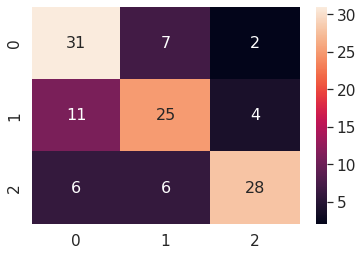

ROC AUC score
{1: 0.78125, 2: 0.7312500000000001, 3: 0.8125}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


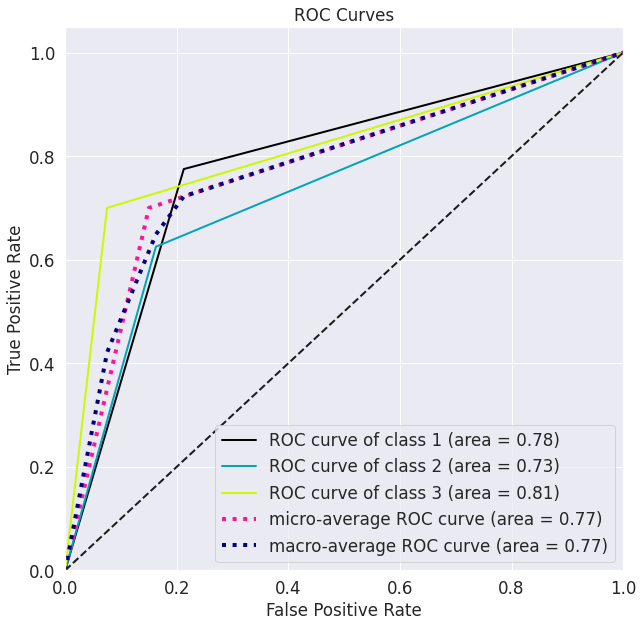

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


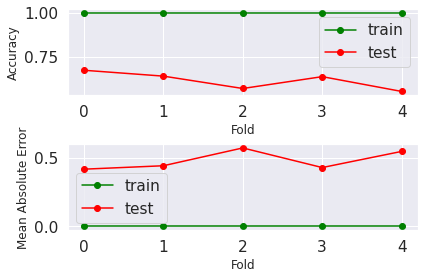

                             precision  \
0  [[0.46153846153846156, 0.55, 0.65]]   
1  [[0.46153846153846156, 0.55, 0.65]]   
2  [[0.46153846153846156, 0.55, 0.65]]   
3  [[0.46153846153846156, 0.55, 0.65]]   
4  [[0.46153846153846156, 0.55, 0.65]]   

                                              recall  \
0  [[0.42857142857142855, 0.4888888888888889, 0.8...   
1  [[0.42857142857142855, 0.4888888888888889, 0.8...   
2  [[0.42857142857142855, 0.4888888888888889, 0.8...   
3  [[0.42857142857142855, 0.4888888888888889, 0.8...   
4  [[0.42857142857142855, 0.4888888888888889, 0.8...   

                                                  f1              accuracy  \
0  [[0.4444444444444445, 0.5176470588235293, 0.72...  [0.5546218487394958]   
1  [[0.4444444444444445, 0.5176470588235293, 0.72...  [0.5546218487394958]   
2  [[0.4444444444444445, 0.5176470588235293, 0.72...  [0.5546218487394958]   
3  [[0.4444444444444445, 0.5176470588235293, 0.72...  [0.5546218487394958]   
4  [[0.4444444444444

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', FastICA(n_components=200)),
                                                ('vt',VarianceThreshold(threshold=80))
                                                ])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=53))])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()

## With Dimesnion Reduction

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=0.5)

DT_piplines={}
for processor_name, processor in std_FE_FS.items():
      pipeline = Pipeline(steps=[(processor_name, processor),
                                ("DT", DT)])

      pipeline_name = processor_name + '_' + 'DT'

      DT_piplines[pipeline_name] = pipeline

results_df = predictionReport(pipelines=DT_piplines)

               accuracy  f1_score  precision_score  recall_score
std_pca_vt_DT  0.641667  0.631646         0.632234      0.641667
std_pca_sp_DT  0.650000  0.639150         0.650573      0.650000
std_ica_vt_DT  0.616667  0.604356         0.600878      0.616667
std_ica_sp_DT  0.675000  0.666760         0.675920      0.675000
std_lle_vt_DT  0.625000  0.622570         0.628009      0.625000
std_lle_sp_DT  0.683333  0.670135         0.676080      0.683333


In [ ]:
# choose one of the best pipeline to tuning classifier again -> 70 -> reduce

DT = DecisionTreeClassifier()
pipeline  = Pipeline(steps=[('processor', std_FE_FS['std_ica_sp']),
                            ('classifier',DT)])


from scipy.stats import randint
#param_grid = dict(classifier__max_depth = np.arange(1,50,4),classifier__criterion = ["gini", "entropy"])
param_grid = dict(processor__sp__percentile = np.arange(70,90,5),
                  processor__ica__n_components = np.arange(100,225,25))

GridSearch = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

GridSearch.fit(X_train,y_train)

# Best hyper
print(GridSearch.best_estimator_)

# Predict & Its results
GridSearch_predictions = GridSearch.predict(X_test)
print(confusion_matrix(y_test,GridSearch_predictions))
print(classification_report(y_test,GridSearch_predictions))#Output

Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('ica',
                                                 FastICA(n_components=100)),
                                                ('sp',
                                                 SelectPercentile(percentile=70))])),
                ('classifier', DecisionTreeClassifier())])
[[29  4  7]
 [13 22  5]
 [ 3  5 32]]
              precision    recall  f1-score   support

           1       0.64      0.72      0.68        40
           2       0.71      0.55      0.62        40
           3       0.73      0.80      0.76        40

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120



Classification Results:
              precision    recall  f1-score   support

           1       0.63      0.82      0.72        40
           2       0.64      0.45      0.53        40
           3       0.75      0.75      0.75        40

    accuracy                           0.68       120
   macro avg       0.68      0.67      0.67       120
weighted avg       0.68      0.68      0.67       120

{'accuracy': 0.675, 'f1_score': 0.6656010230179028, 'precision_score': 0.6758241758241758, 'recall_score': 0.6749999999999999, 'recall for class 1': 0.6346153846153846, 'recall for class 2': 0.6428571428571429, 'recall for class 3': 0.75, 'precision for class 1': 0.825, 'precision for class 2': 0.45, 'precision for class 3': 0.75}


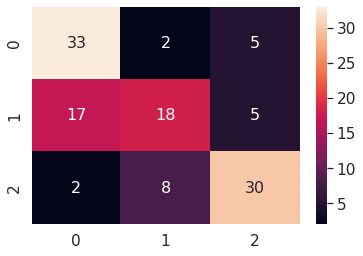

ROC AUC score
{1: 0.79375, 2: 0.6625, 3: 0.8125}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



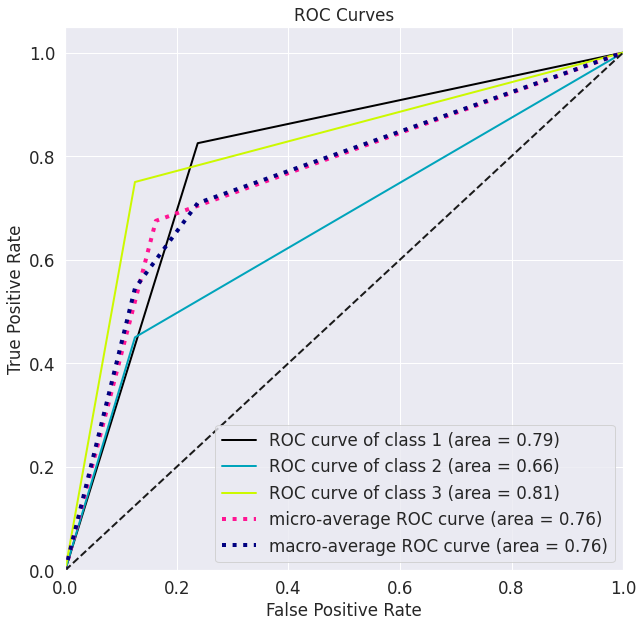

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


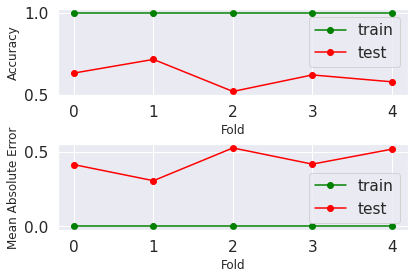

                            precision  \
0  [[0.5641025641025641, 0.575, 0.6]]   
1  [[0.5641025641025641, 0.575, 0.6]]   
2  [[0.5641025641025641, 0.575, 0.6]]   
3  [[0.5641025641025641, 0.575, 0.6]]   
4  [[0.5641025641025641, 0.575, 0.6]]   

                                             recall  \
0  [[0.55, 0.5227272727272727, 0.6857142857142857]]   
1  [[0.55, 0.5227272727272727, 0.6857142857142857]]   
2  [[0.55, 0.5227272727272727, 0.6857142857142857]]   
3  [[0.55, 0.5227272727272727, 0.6857142857142857]]   
4  [[0.55, 0.5227272727272727, 0.6857142857142857]]   

                                                 f1              accuracy  \
0  [[0.5569620253164557, 0.5476190476190476, 0.64]]  [0.5798319327731093]   
1  [[0.5569620253164557, 0.5476190476190476, 0.64]]  [0.5798319327731093]   
2  [[0.5569620253164557, 0.5476190476190476, 0.64]]  [0.5798319327731093]   
3  [[0.5569620253164557, 0.5476190476190476, 0.64]]  [0.5798319327731093]   
4  [[0.5569620253164557, 0.5476190476

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',std_FE_FS['std_ica_sp']),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=0.5))])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()
#ica_sp_GB_validation.PlotLearningAndErrorCurve( pca_vt_knn)

# 5.4. Gradient Bossting

Search for LearningRate and n_estimators

In [ ]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [10,20,30,50,100,150,200]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.703377 using {'learning_rate': 0.5, 'n_estimators': 150}
prediction on test set is: 0.7310924


In [ ]:
gb_grid = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150)

gb_validation = Validation(gb_grid)
gb_validation.PlotLearningAndErrorCurve(gb_grid)
gb_validation.PredictionPerformance(gb_grid)

** Search for subsample, Maxdepth, min_samples_split, min_samples_leaf**

In [ ]:
param_grid = {#'learning_rate'   :  np.arange(0.5, 4,0.5),
              #'n_estimators'    : [10,20,30,50,100,150,200],
              'subsample'       : np.arange(0.1, 1.1,0.1),
              'max_depth'       : np.arange(10, 60,10),
              'min_samples_split' : np.arange(0.1, 1.1,0.1),
              'min_samples_leaf': np.arange(0.1, 0.6,0.1),
}

model_GB = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150)
GB_GridSearch = GridSearch(X_train,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

## With Dimesional reduction

In [ ]:
GB = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150)

GB_piplines={}
for processor_name, processor in std_FE_FS.items():
      pipeline = Pipeline(steps=[(processor_name, processor),
                                ("GB", GB)])

      pipeline_name = processor_name + '_' + 'GB'

      GB_piplines[pipeline_name] = pipeline

results_df = predictionReport(pipelines=GB_piplines)

               accuracy  f1_score  precision_score  recall_score
std_pca_vt_GB  0.850000  0.837707         0.883277      0.850000
std_pca_sp_GB  0.858333  0.848768         0.876296      0.858333
std_ica_vt_GB  0.950000  0.950190         0.954416      0.950000
std_ica_sp_GB  0.975000  0.974965         0.976744      0.975000
std_lle_vt_GB  0.791667  0.780241         0.847510      0.791667
std_lle_sp_GB  0.800000  0.788363         0.864626      0.800000


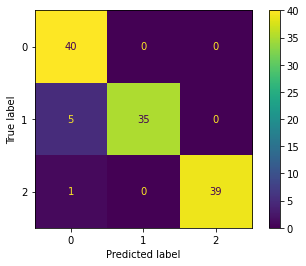

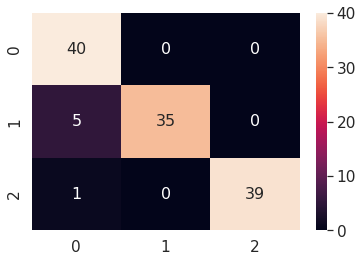

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ("ica",FastICA(n_components=200)),
                                                ('sp',VarianceThreshold(threshold=80))
                                                ])),
                ('classifier', GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))])

predictions, _ = fit_predict(pipeline=pca_vt_knn)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

plotting_confunsion_matrix(cm)

Classification Results:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        40
           2       1.00      0.93      0.96        40
           3       1.00      1.00      1.00        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

{'accuracy': 0.975, 'f1_score': 0.9749647942419027, 'precision_score': 0.9767441860465116, 'recall_score': 0.975, 'recall for class 1': 1.0, 'recall for class 2': 0.925, 'recall for class 3': 1.0, 'precision for class 1': 0.9302325581395349, 'precision for class 2': 1.0, 'precision for class 3': 1.0}


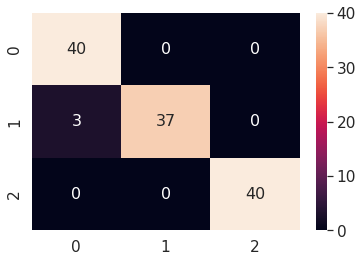

ROC AUC score
{1: 0.9812500000000001, 2: 0.9625, 3: 1.0}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


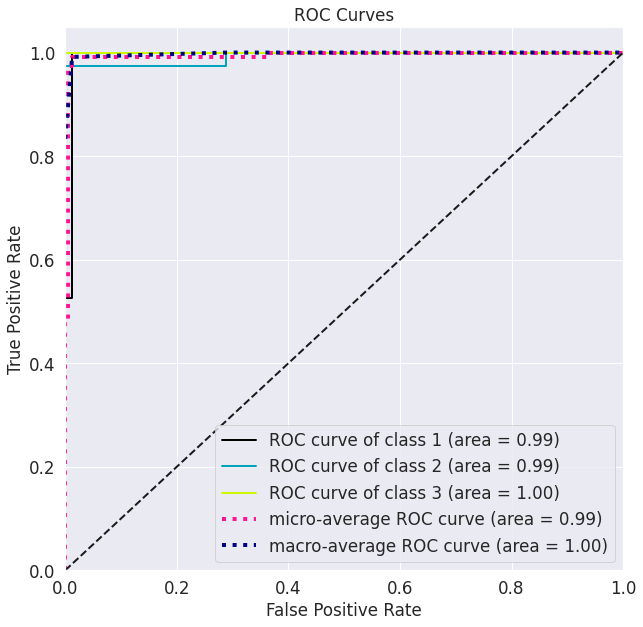

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ("ica",FastICA(n_components=200)),
                                                ('sp',VarianceThreshold(threshold=80))
                                                ])),
                ('classifier', GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))])

combination_measurement(pipeline = pca_vt_knn)

Classification Results:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        40
           2       1.00      0.88      0.93        40
           3       0.98      1.00      0.99        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

{'accuracy': 0.9583333333333334, 'f1_score': 0.9577895355673133, 'precision_score': 0.9615668883961567, 'recall_score': 0.9583333333333334, 'recall for class 1': 1.0, 'recall for class 2': 0.875, 'recall for class 3': 1.0, 'precision for class 1': 0.9090909090909091, 'precision for class 2': 1.0, 'precision for class 3': 0.975609756097561}


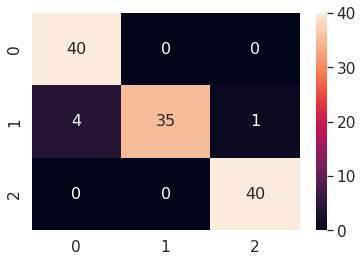

ROC AUC score
{1: 0.975, 2: 0.9375, 3: 0.99375}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


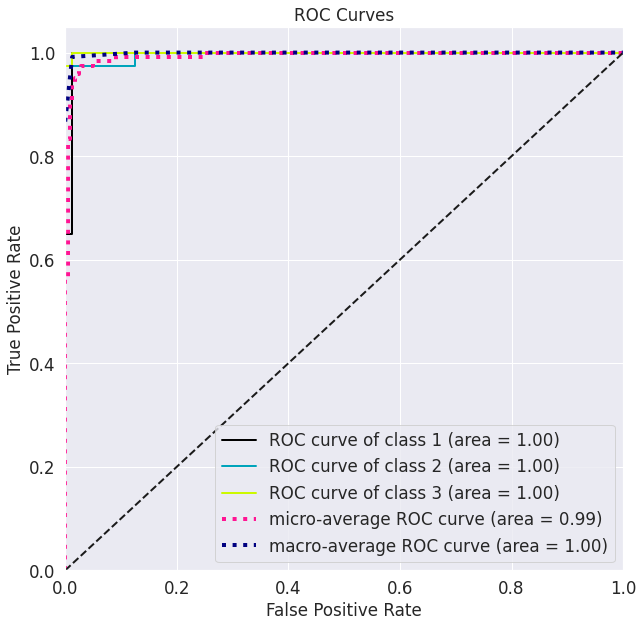

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ("ica",FastICA(n_components=200)),
                                                ('sp',SelectPercentile(f_classif,percentile=80))
                                                ])),
                ('classifier', GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))])

combination_measurement(pipeline = pca_vt_knn)

Classification Results:
              precision    recall  f1-score   support

           1       0.67      0.97      0.80        40
           2       1.00      0.45      0.62        40
           3       0.77      0.85      0.81        40

    accuracy                           0.76       120
   macro avg       0.82      0.76      0.74       120
weighted avg       0.82      0.76      0.74       120

{'accuracy': 0.7583333333333333, 'f1_score': 0.7420439440143873, 'precision_score': 0.8150470219435736, 'recall_score': 0.7583333333333333, 'recall for class 1': 0.6724137931034483, 'recall for class 2': 1.0, 'recall for class 3': 0.7727272727272727, 'precision for class 1': 0.975, 'precision for class 2': 0.45, 'precision for class 3': 0.85}


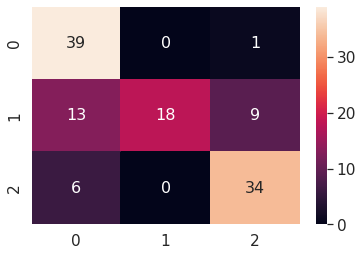

ROC AUC score
{1: 0.8687499999999999, 2: 0.725, 3: 0.8625}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


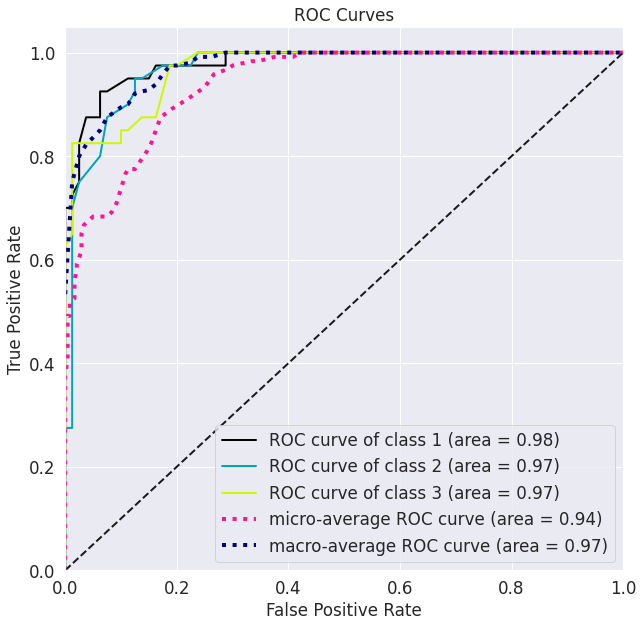

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.96)),
                                                ('vt',VarianceThreshold(threshold=75))
                                                ])),
                ('classifier',RandomForestClassifier())])

combination_measurement(pipeline = pca_vt_knn)

Classification Results:
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        40
           2       1.00      0.50      0.67        40
           3       0.83      1.00      0.91        40

    accuracy                           0.83       120
   macro avg       0.87      0.83      0.82       120
weighted avg       0.87      0.83      0.82       120

{'accuracy': 0.8333333333333334, 'f1_score': 0.8151075977162935, 'precision_score': 0.8675213675213675, 'recall_score': 0.8333333333333334, 'recall for class 1': 0.7692307692307693, 'recall for class 2': 1.0, 'recall for class 3': 0.8333333333333334, 'precision for class 1': 1.0, 'precision for class 2': 0.5, 'precision for class 3': 1.0}


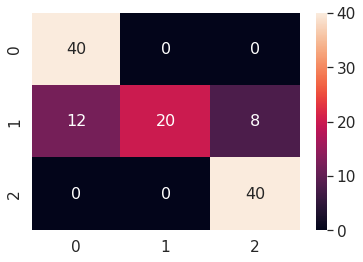

ROC AUC score
{1: 0.9249999999999999, 2: 0.75, 3: 0.9500000000000001}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


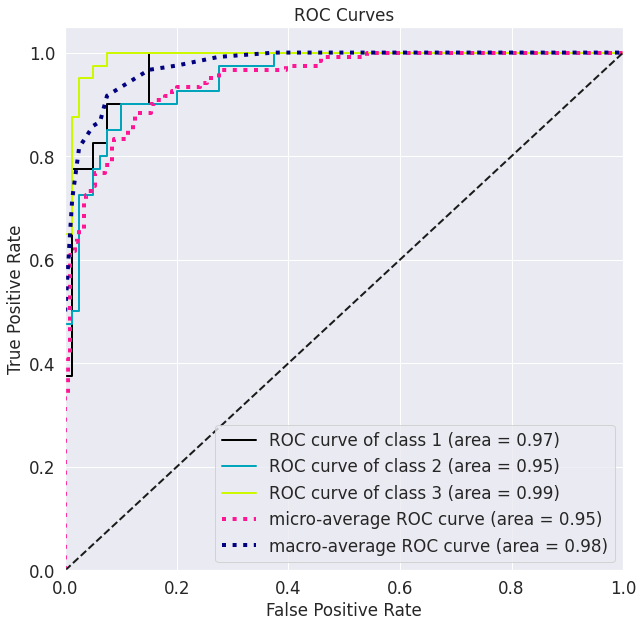

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.96)),
                                                ('vt',SelectPercentile(f_classif,percentile=79))
                                                ])),
                ('classifier',GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))])

combination_measurement(pipeline = pca_vt_knn)

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.96)),
                                                ('vt',SelectPercentile(f_classif,percentile=79))
                                                ])),
                ('classifier',GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))])

combination_measurement(pipeline = pca_vt_knn)

Classification Results:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.59      0.55      0.57        40
           2       0.45      0.45      0.45        40
           3       0.73      0.82      0.78        40

    accuracy                           0.66       160
   macro avg       0.66      0.66      0.65       160
weighted avg       0.66      0.66      0.65       160

{'accuracy': 0.65625, 'f1_score': 0.6546029950441714, 'precision_score': 0.6550082977714556, 'recall_score': 0.65625, 'recall for class 1': 0.8, 'recall for class 2': 0.55, 'recall for class 3': 0.45, 'precision for class 1': 0.8421052631578947, 'precision for class 2': 0.5945945945945946, 'precision for class 3': 0.45}


ValueError: ignored

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.95)),
                                                ('vt',VarianceThreshold(threshold=75))
                                                ])),
                ('classifier',GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 160))])

combination_measurement(pipeline = pca_vt_knn)

KeyboardInterrupt: ignored

Classification Results:
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           2       1.00      0.82      0.90        40
           3       1.00      1.00      1.00        40

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120

{'accuracy': 0.9416666666666667, 'f1_score': 0.9412166063087177, 'precision_score': 0.9503546099290779, 'recall_score': 0.9416666666666668, 'recall for class 1': 0.851063829787234, 'recall for class 2': 1.0, 'recall for class 3': 1.0, 'precision for class 1': 1.0, 'precision for class 2': 0.825, 'precision for class 3': 1.0}


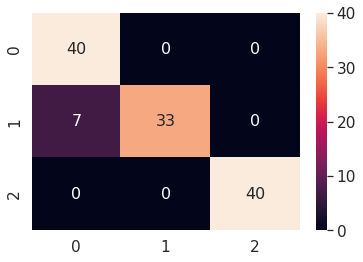

ROC AUC score
{1: 0.9562499999999999, 2: 0.9125, 3: 1.0}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



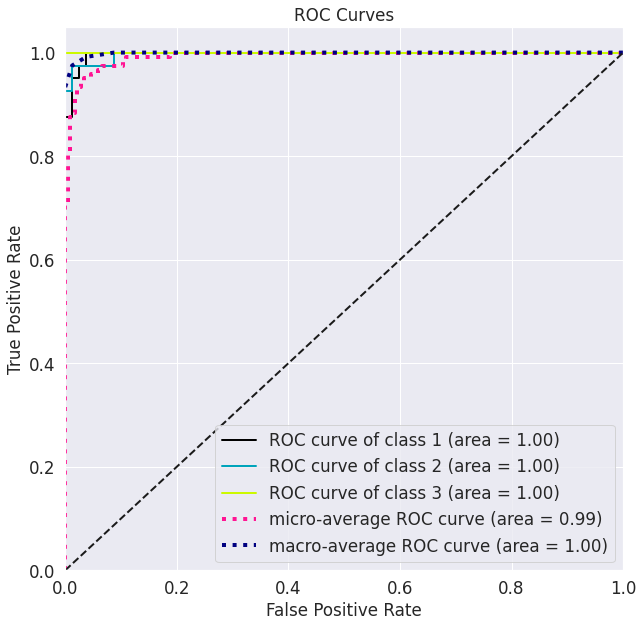

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


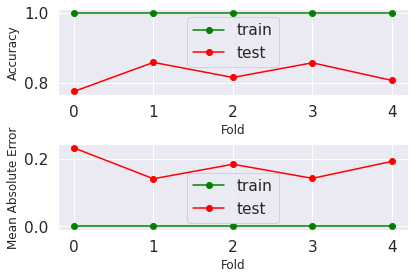

                           precision                            recall  \
0  [[0.5641025641025641, 1.0, 0.85]]  [[1.0, 0.6349206349206349, 1.0]]   
1  [[0.5641025641025641, 1.0, 0.85]]  [[1.0, 0.6349206349206349, 1.0]]   
2  [[0.5641025641025641, 1.0, 0.85]]  [[1.0, 0.6349206349206349, 1.0]]   
3  [[0.5641025641025641, 1.0, 0.85]]  [[1.0, 0.6349206349206349, 1.0]]   
4  [[0.5641025641025641, 1.0, 0.85]]  [[1.0, 0.6349206349206349, 1.0]]   

                                                  f1              accuracy  \
0  [[0.7213114754098361, 0.7766990291262136, 0.91...  [0.8067226890756303]   
1  [[0.7213114754098361, 0.7766990291262136, 0.91...  [0.8067226890756303]   
2  [[0.7213114754098361, 0.7766990291262136, 0.91...  [0.8067226890756303]   
3  [[0.7213114754098361, 0.7766990291262136, 0.91...  [0.8067226890756303]   
4  [[0.7213114754098361, 0.7766990291262136, 0.91...  [0.8067226890756303]   

                                                  cf                    MAE  
0  [[[[8

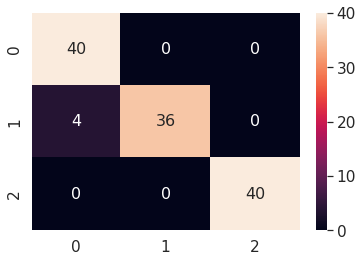

ROC AUC score
{1: 0.975, 2: 0.95, 3: 1.0}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



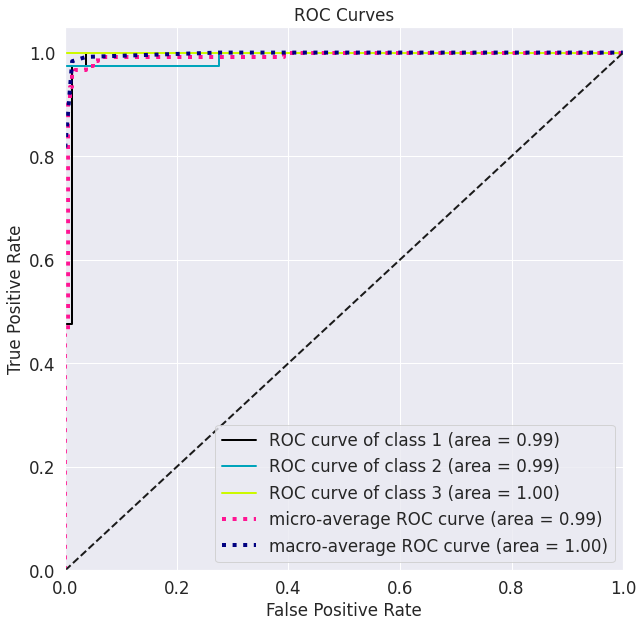

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


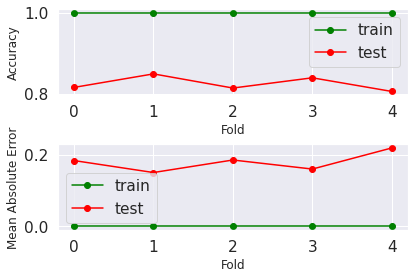

                            precision  \
0  [[0.5897435897435898, 1.0, 0.825]]   
1  [[0.5897435897435898, 1.0, 0.825]]   
2  [[0.5897435897435898, 1.0, 0.825]]   
3  [[0.5897435897435898, 1.0, 0.825]]   
4  [[0.5897435897435898, 1.0, 0.825]]   

                                              recall  \
0  [[0.9583333333333334, 0.6666666666666666, 0.94...   
1  [[0.9583333333333334, 0.6666666666666666, 0.94...   
2  [[0.9583333333333334, 0.6666666666666666, 0.94...   
3  [[0.9583333333333334, 0.6666666666666666, 0.94...   
4  [[0.9583333333333334, 0.6666666666666666, 0.94...   

                                  f1              accuracy  \
0  [[0.7301587301587301, 0.8, 0.88]]  [0.8067226890756303]   
1  [[0.7301587301587301, 0.8, 0.88]]  [0.8067226890756303]   
2  [[0.7301587301587301, 0.8, 0.88]]  [0.8067226890756303]   
3  [[0.7301587301587301, 0.8, 0.88]]  [0.8067226890756303]   
4  [[0.7301587301587301, 0.8, 0.88]]  [0.8067226890756303]   

                                           

In [ ]:
for processor in ['std_ica_sp','std_ica_vt']:
  pca_vt_knn  = Pipeline(steps=[('processor',std_FE_FS[processor]),
                ('classifier',
                 GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))])

  combination_measurement(pipeline = pca_vt_knn)

  ica_sp_GB_validation = Validation( pca_vt_knn)
  ica_sp_GB_validation.FitAndPrediction()
  #ica_sp_GB_validation.PlotLearningAndErrorCurve( pca_vt_knn)


learning curve of the highest

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


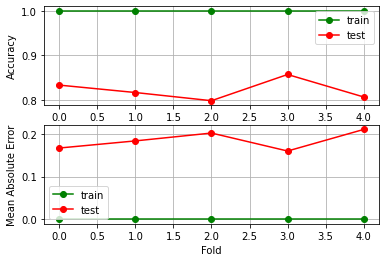

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


precision  \
0  [[0.5897435897435898, 0.975, 0.8]]   
1  [[0.5897435897435898, 0.975, 0.8]]   
2  [[0.5897435897435898, 0.975, 0.8]]   
3  [[0.5897435897435898, 0.975, 0.8]]   
4  [[0.5897435897435898, 0.975, 0.8]]   

                                             recall  \
0  [[0.8846153846153846, 0.65, 0.9696969696969697]]   
1  [[0.8846153846153846, 0.65, 0.9696969696969697]]   
2  [[0.8846153846153846, 0.65, 0.9696969696969697]]   
3  [[0.8846153846153846, 0.65, 0.9696969696969697]]   
4  [[0.8846153846153846, 0.65, 0.9696969696969697]]   

                                                 f1              accuracy  \
0  [[0.7076923076923076, 0.78, 0.8767123287671234]]  [0.7899159663865546]   
1  [[0.7076923076923076, 0.78, 0.8767123287671234]]  [0.7899159663865546]   
2  [[0.7076923076923076, 0.78, 0.8767123287671234]]  [0.7899159663865546]   
3  [[0.7076923076923076, 0.78, 0.8767123287671234]]  [0.7899159663865546]   
4  [[0.7076923076923076, 0.78, 0.8767123287671234]]  [0.7899159663865546]   

                                                  cf                    MAE  
0  [[[[77 16], [ 3 23]], [[58  1], [21 39]], [[78...  [0.23529411764705882]  
1  [[[[77 16], [ 3 23]], [[58  1], [21 39]], [[78...  [0.23529411764705882]  
2  [[[[77 16], [ 3 23]], [[58  1], [21 39]], [[78...  [0.23529411764705882]  
3  [[[[77 16], [ 3 23]], [[58  1], [21 39]], [[78...  [0.23529411764705882]  
4  [[[[77 16], [ 3 23]], [[58  1], [21 39]], [[78...  [0.23529411764705882]

In [ ]:
# std_ica_sp_GB  0.975000

std_ica_sp_GB  = Pipeline(steps=[('processor', std_FE_FS['std_ica_sp']),
                            ('classifier',GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150))
                            ])

ica_sp_GB_validation = Validation(std_ica_sp_GB)
ica_sp_GB_validation.PlotLearningAndErrorCurve(std_ica_sp_GB)
ica_sp_GB_validation.PredictionPerformance(std_ica_sp_GB)

## Validation Curve

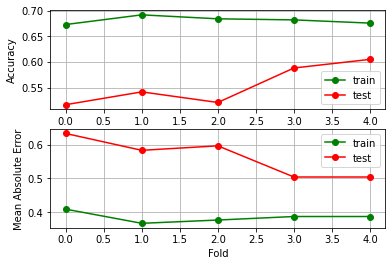

precision  \
0  [[0.6153846153846154, 0.25, 0.95]]   
1  [[0.6153846153846154, 0.25, 0.95]]   
2  [[0.6153846153846154, 0.25, 0.95]]   
3  [[0.6153846153846154, 0.25, 0.95]]   
4  [[0.6153846153846154, 0.25, 0.95]]   

                                              recall  \
0  [[0.6486486486486487, 0.7142857142857143, 0.55...   
1  [[0.6486486486486487, 0.7142857142857143, 0.55...   
2  [[0.6486486486486487, 0.7142857142857143, 0.55...   
3  [[0.6486486486486487, 0.7142857142857143, 0.55...   
4  [[0.6486486486486487, 0.7142857142857143, 0.55...   

                                                  f1              accuracy  \
0  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
1  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
2  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
3  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
4  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   

                                                  cf                   MAE  
0  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
1  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
2  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
3  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
4  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]

In [ ]:
gb_22_6_5 = GradientBoostingClassifier(n_estimators=25,max_depth=7,subsample=0.5)

gb_validation = Validation(gb_22_6_5)
gb_validation.PlotLearningAndErrorCurve()
gb_validation.PredictionPerformance()

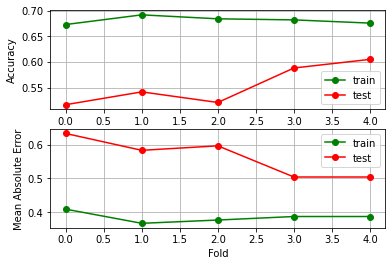

precision  \
0  [[0.6153846153846154, 0.25, 0.95]]   
1  [[0.6153846153846154, 0.25, 0.95]]   
2  [[0.6153846153846154, 0.25, 0.95]]   
3  [[0.6153846153846154, 0.25, 0.95]]   
4  [[0.6153846153846154, 0.25, 0.95]]   

                                              recall  \
0  [[0.6486486486486487, 0.7142857142857143, 0.55...   
1  [[0.6486486486486487, 0.7142857142857143, 0.55...   
2  [[0.6486486486486487, 0.7142857142857143, 0.55...   
3  [[0.6486486486486487, 0.7142857142857143, 0.55...   
4  [[0.6486486486486487, 0.7142857142857143, 0.55...   

                                                  f1              accuracy  \
0  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
1  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
2  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
3  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   
4  [[0.631578947368421, 0.37037037037037035, 0.70...  [0.6050420168067226]   

                                                  cf                   MAE  
0  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
1  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
2  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
3  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]  
4  [[[[67 15], [13 24]], [[75 30], [ 4 10]], [[49...  [0.5042016806722689]

In [ ]:
pca_fpr_gb = Pipeline(steps=[('preprocess',FeatureUnion(transformer_list=[('pca', PCA(n_components=0.85)),
                                                                          ('fpr', SelectFpr(alpha=0.5))])),
                             ('classifier', gb_22_6_5 )])


pca_fpr_gb_validation = Validation(pca_fpr_gb)
pca_fpr_gb_validation.PlotLearningAndErrorCurve()
pca_fpr_gb_validation.PredictionPerformance()

In [ ]:
pca_fpr_gb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'classifier', 'preprocess__n_jobs', 'preprocess__transformer_list', 'preprocess__transformer_weights', 'preprocess__verbose', 'preprocess__pca', 'preprocess__fpr', 'preprocess__pca__copy', 'preprocess__pca__iterated_power', 'preprocess__pca__n_components', 'preprocess__pca__random_state', 'preprocess__pca__svd_solver', 'preprocess__pca__tol', 'preprocess__pca__whiten', 'preprocess__fpr__alpha', 'preprocess__fpr__score_func', 'classifier__ccp_alpha', 'classifier__criterion', 'classifier__init', 'classifier__learning_rate', 'classifier__loss', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_iter_no_change', 'classifier__random_state', 'classifier__subsample', 'classifier__tol', 'classifier__validation_fraction', 'clas

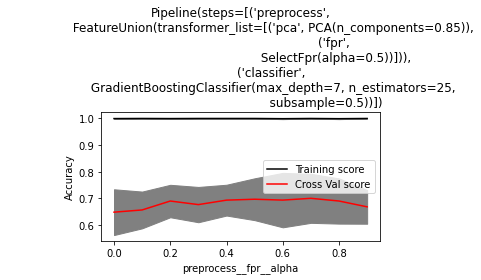

In [ ]:
plot_validation_curve(classifier=pca_fpr_gb, param_name='preprocess__fpr__alpha', param_range=np.arange(0,1,0.1))

In [ ]:
hyperparameters = {'preprocess__fpr__alpha':np.arange(0,1,0.1),
                   'preprocess__pca__n_components':np.arange(0.7,0.99,0.05)}

clf = GridSearchCV(pca_fpr_gb,hyperparameters,cv=5,
                                 verbose=0,
                                 n_jobs=-1,
                           error_score='raise'
                                 )
# Fit randomized search
best_model = clf.fit(X_train, y_train)
message = (best_model.best_score_, best_model.best_params_)
print("Best: %f using %s" % (message))

Best: 0.688662 using {'preprocess__fpr__alpha': 0.9, 'preprocess__pca__n_components': 0.7}


# 5.5. Random Forest

In [ ]:
# Create a search grid of parameters that will be shuffled through

param_grid = {'bootstrap': [True],
              #'criterion':['gini', 'entropy', 'log_loss'],
              #'max_samples':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'max_depth': [20,25,30,35,40,45,50],
              #'max_features': ['auto', 'sqrt'],
              'min_samples_leaf':  [0.05],              # (0.0 to 0.5],
              'min_samples_split': [0.05],              # (0.0 to 1.0],
              'n_estimators': [25,30,35,40,50,55,60,70,80],
              }

# Using the random grid and searching for best hyperparameters

rf = RandomForestClassifier() #creating base model

RF_RandomSearch = RandomSearch(X_train,y_train,rf, param_grid)

Prediction_RF = RF_RandomSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_RF).mean(),7))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 63 is smaller than n_iter=100. Running 63 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best: 0.543399 using {'n_estimators': 55, 'min_samples_split': 0.05, 'min_samples_leaf': 0.05, 'max_depth': 45, 'bootstrap': True}
prediction on test set is: 0.5333333


No fine tune

Classification Results:
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           2       0.97      0.82      0.89        40
           3       0.95      0.93      0.94        40

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

{'accuracy': 0.9166666666666666, 'f1_score': 0.9160469941788144, 'precision_score': 0.9234566712664334, 'recall_score': 0.9166666666666666, 'recall for class 1': 0.851063829787234, 'recall for class 2': 0.9705882352941176, 'recall for class 3': 0.9487179487179487, 'precision for class 1': 1.0, 'precision for class 2': 0.825, 'precision for class 3': 0.925}


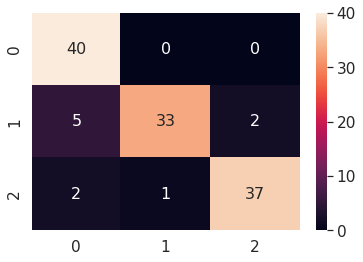

ROC AUC score
{1: 0.9562499999999999, 2: 0.90625, 3: 0.9500000000000001}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


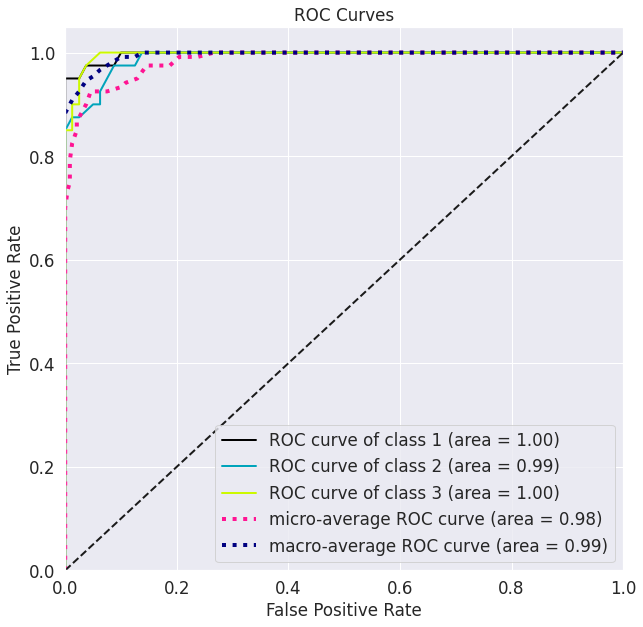

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


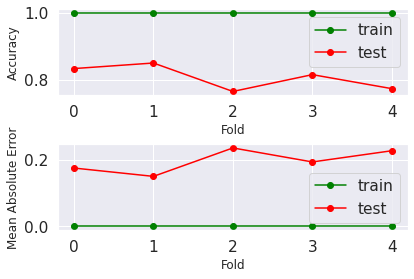

                            precision                            recall  \
0  [[0.5384615384615384, 0.975, 0.8]]  [[0.9545454545454546, 0.6, 1.0]]   
1  [[0.5384615384615384, 0.975, 0.8]]  [[0.9545454545454546, 0.6, 1.0]]   
2  [[0.5384615384615384, 0.975, 0.8]]  [[0.9545454545454546, 0.6, 1.0]]   
3  [[0.5384615384615384, 0.975, 0.8]]  [[0.9545454545454546, 0.6, 1.0]]   
4  [[0.5384615384615384, 0.975, 0.8]]  [[0.9545454545454546, 0.6, 1.0]]   

                                                  f1             accuracy  \
0  [[0.6885245901639344, 0.7428571428571429, 0.88...  [0.773109243697479]   
1  [[0.6885245901639344, 0.7428571428571429, 0.88...  [0.773109243697479]   
2  [[0.6885245901639344, 0.7428571428571429, 0.88...  [0.773109243697479]   
3  [[0.6885245901639344, 0.7428571428571429, 0.88...  [0.773109243697479]   
4  [[0.6885245901639344, 0.7428571428571429, 0.88...  [0.773109243697479]   

                                                  cf                  MAE  
0  [[[[79 

In [ ]:
# ICA_VT_RF
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', FastICA(n_components=200)),
                                                ('vt',SelectPercentile(f_classif,percentile=80))
                                                ])),
                ('classifier',RandomForestClassifier())])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()

Classification Results:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        40
           2       0.97      0.88      0.92        40
           3       0.95      0.95      0.95        40

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

{'accuracy': 0.9416666666666667, 'f1_score': 0.9411445279866332, 'precision_score': 0.9437710437710437, 'recall_score': 0.9416666666666668, 'recall for class 1': 0.9090909090909091, 'recall for class 2': 0.9722222222222222, 'recall for class 3': 0.95, 'precision for class 1': 1.0, 'precision for class 2': 0.875, 'precision for class 3': 0.95}


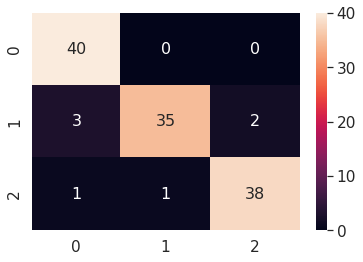

ROC AUC score
{1: 0.975, 2: 0.93125, 3: 0.9624999999999999}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


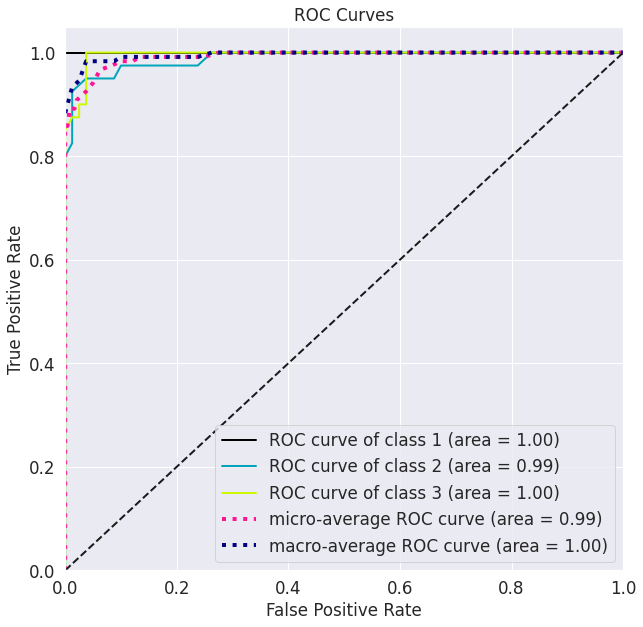

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


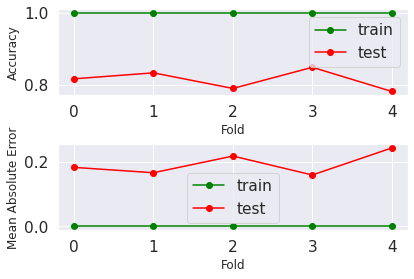

                            precision  \
0  [[0.5128205128205128, 1.0, 0.825]]   
1  [[0.5128205128205128, 1.0, 0.825]]   
2  [[0.5128205128205128, 1.0, 0.825]]   
3  [[0.5128205128205128, 1.0, 0.825]]   
4  [[0.5128205128205128, 1.0, 0.825]]   

                                              recall  \
0  [[0.9523809523809523, 0.6349206349206349, 0.94...   
1  [[0.9523809523809523, 0.6349206349206349, 0.94...   
2  [[0.9523809523809523, 0.6349206349206349, 0.94...   
3  [[0.9523809523809523, 0.6349206349206349, 0.94...   
4  [[0.9523809523809523, 0.6349206349206349, 0.94...   

                                                 f1              accuracy  \
0  [[0.6666666666666666, 0.7766990291262136, 0.88]]  [0.7815126050420168]   
1  [[0.6666666666666666, 0.7766990291262136, 0.88]]  [0.7815126050420168]   
2  [[0.6666666666666666, 0.7766990291262136, 0.88]]  [0.7815126050420168]   
3  [[0.6666666666666666, 0.7766990291262136, 0.88]]  [0.7815126050420168]   
4  [[0.6666666666666666, 0.7766

In [ ]:
# ICA_ANOVA_RF
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', FastICA(n_components=200)),
                                                ('vt',VarianceThreshold(threshold=80))
                                                ])),
                ('classifier',
                RandomForestClassifier())])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()

In [ ]:
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=0.95)),
                                                #('vt',VarianceThreshold(threshold=75))
                                                ])),
                ('classifier',RandomForestClassifier())])

combination_measurement(pipeline = pca_vt_knn)

Classification Results:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.54      0.47      0.51        40
           2       0.35      0.35      0.35        40
           3       0.67      0.78      0.72        40

    accuracy                           0.59       160
   macro avg       0.59      0.59      0.59       160
weighted avg       0.59      0.59      0.59       160

{'accuracy': 0.59375, 'f1_score': 0.5906017564517712, 'precision_score': 0.5904104953017996, 'recall_score': 0.59375, 'recall for class 1': 0.775, 'recall for class 2': 0.475, 'recall for class 3': 0.35, 'precision for class 1': 0.7948717948717948, 'precision for class 2': 0.5428571428571428, 'precision for class 3': 0.35}


ValueError: ignored

### Vadilation Curve

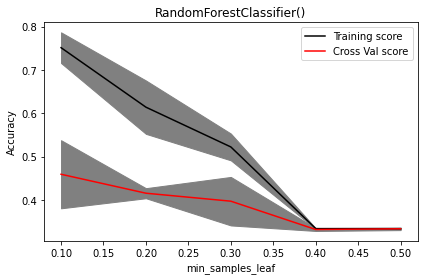

In [ ]:
plot_validation_curve(rf, 'min_samples_leaf',[0.1,0.2,0.3,0.4,0.5] )

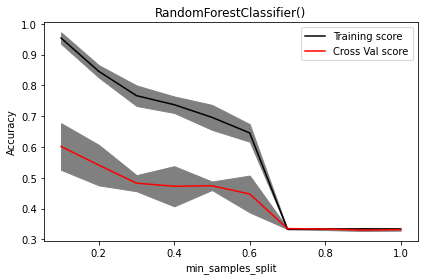

In [ ]:
plot_validation_curve(rf, 'min_samples_split', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] )

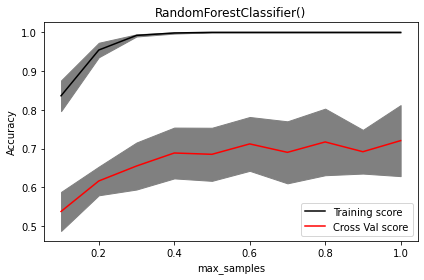

In [ ]:
# max_samples
plot_validation_curve(rf, 'max_samples', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] )

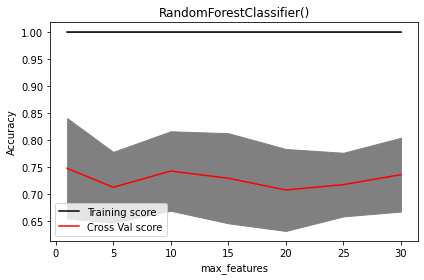

In [ ]:
plot_validation_curve(rf, 'max_features', [1,5,10,15,20,25,30] )

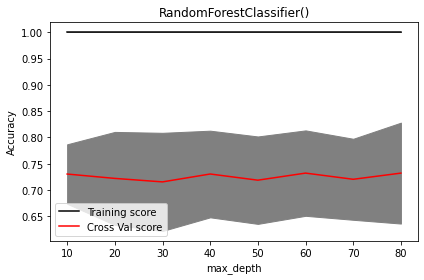

In [ ]:
plot_validation_curve(rf, 'max_depth', np.arange(0,90,10) )

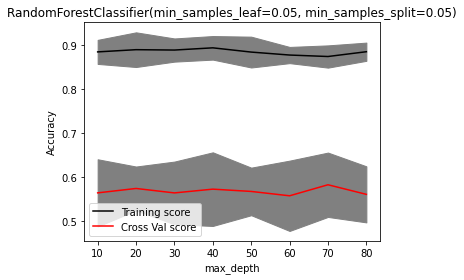

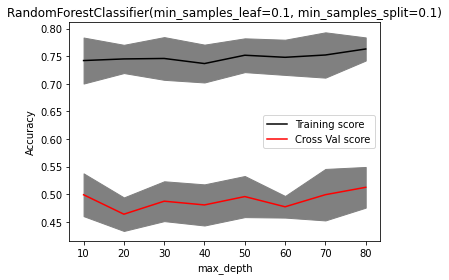

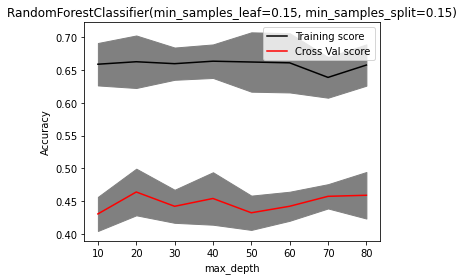

In [ ]:
for i in [0.05,0.1,0.15]:
  plot_validation_curve(RandomForestClassifier(min_samples_leaf=i,min_samples_split=i),
                        'max_depth',
                        np.arange(0,90,10) )

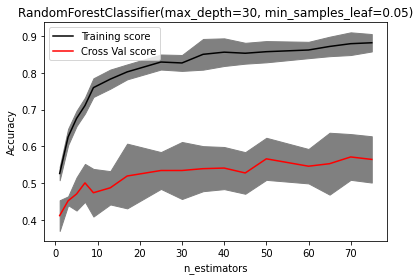

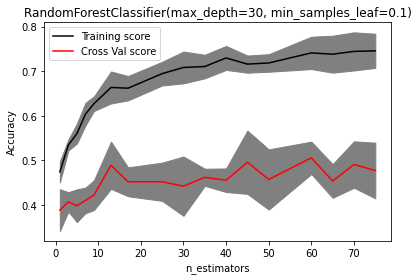

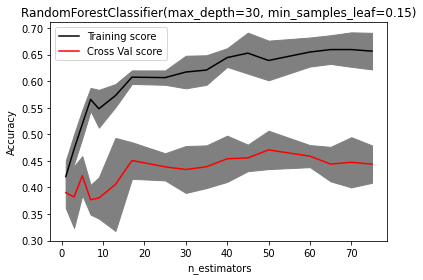

In [ ]:
for i in [0.05,0.1,0.15]:
  plot_validation_curve(RandomForestClassifier(min_samples_leaf=i,max_depth=30),
                        'n_estimators',
                        [1,3,5,7,9,13,17,25,30,35,40,45,50,60,65,70,75] )

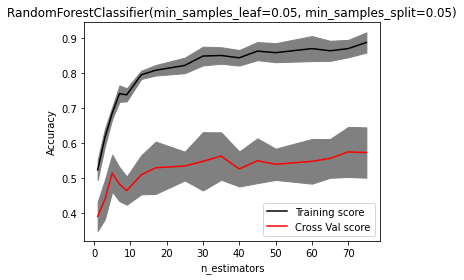

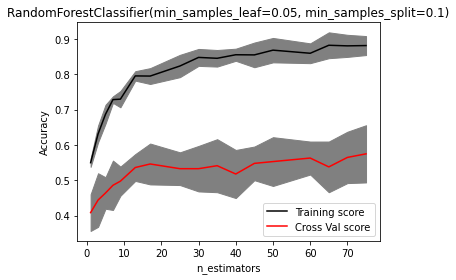

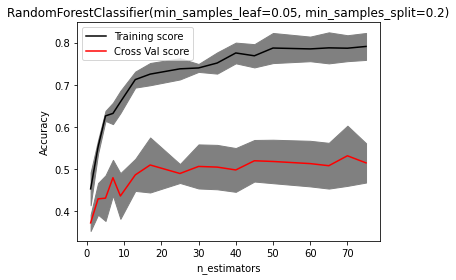

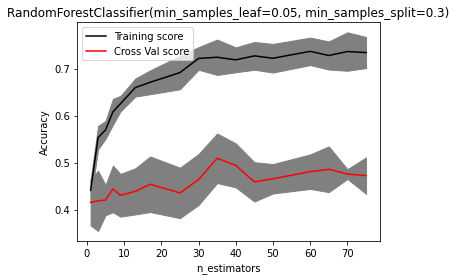

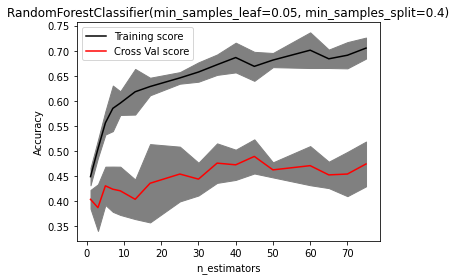

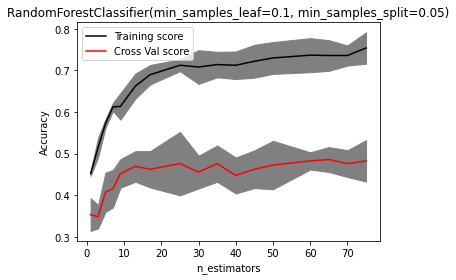

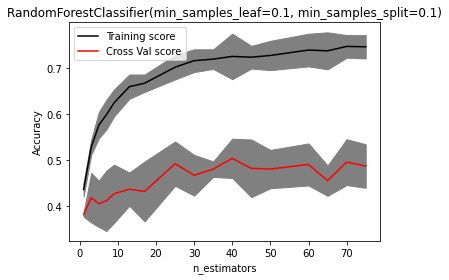

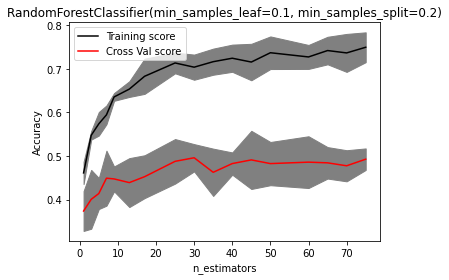

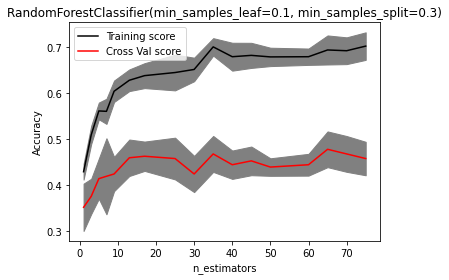

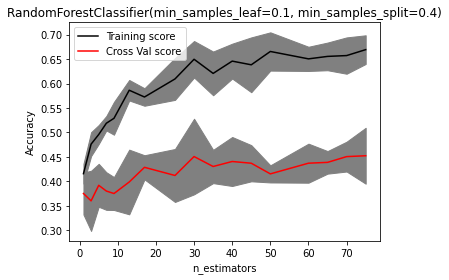

In [ ]:
# min_samples_leaf + min_samples_split : prvent overfit
for i in [0.05,0.1]:
  for j in [0.05,0.1,0.2,0.3,0.4]:
      plot_validation_curve(RandomForestClassifier(min_samples_leaf=i,
                                                   min_samples_split=j),
                            'n_estimators',
                            [1,3,5,7,9,13,17,25,30,35,40,45,50,60,65,70,75] )

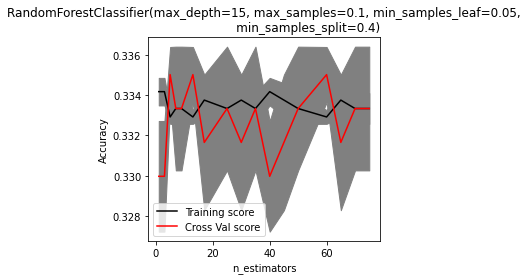

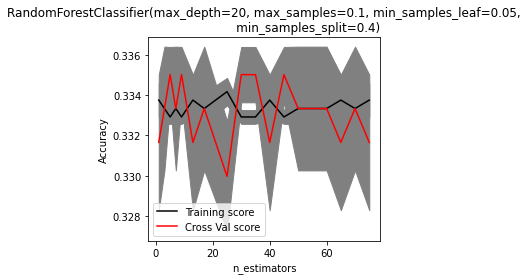

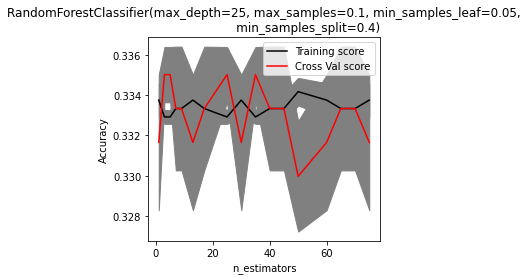

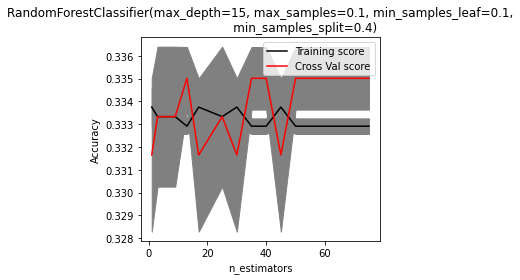

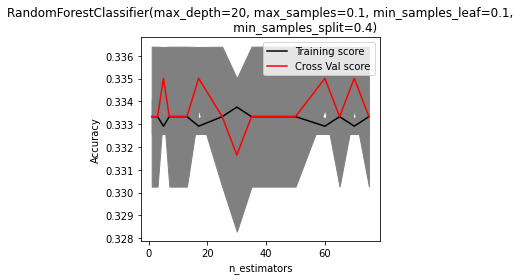

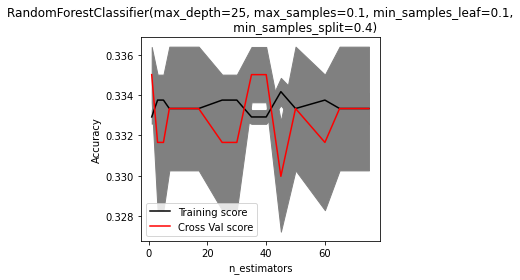

In [ ]:
for i in [0.05,0.1]:
  for m in [15,20,25]:
      plot_validation_curve(RandomForestClassifier(min_samples_leaf=i,max_depth=m,
                                                   min_samples_split=0.4,max_samples=0.1),
                            'n_estimators',
                            [1,3,5,7,9,13,17,25,30,35,40,45,50,60,65,70,75] )

# 5.7. LDA

In [ ]:
LDA = LinearDiscriminantAnalysis()

# Hyper dict
param_grid = {'solver':['svd', 'lsqr', 'eigen']}

# GridSearch
grid = GridSearchCV(LDA, param_grid, verbose=-1, error_score='raise')

grid.fit(X_train,y_train)

# Best hyper
print(grid.best_estimator_)

# Predict & Its results
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

LinAlgError: ignored

In [ ]:
print(grid.best_estimator_)


LinearDiscriminantAnalysis()


No Fine tuned

Classification Results:
              precision    recall  f1-score   support

           1       0.71      0.97      0.82        40
           2       0.94      0.38      0.54        40
           3       0.82      1.00      0.90        40

    accuracy                           0.78       120
   macro avg       0.82      0.78      0.75       120
weighted avg       0.82      0.78      0.75       120

{'accuracy': 0.7833333333333333, 'f1_score': 0.7518811072625384, 'precision_score': 0.8209724799010513, 'recall_score': 0.7833333333333333, 'recall for class 1': 0.7090909090909091, 'recall for class 2': 0.9375, 'recall for class 3': 0.8163265306122449, 'precision for class 1': 0.975, 'precision for class 2': 0.375, 'precision for class 3': 1.0}


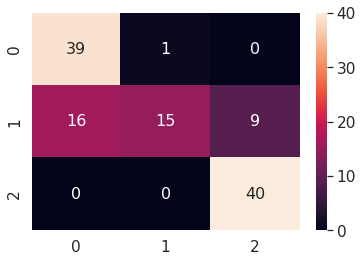

ROC AUC score
{1: 0.8875000000000001, 2: 0.68125, 3: 0.94375}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


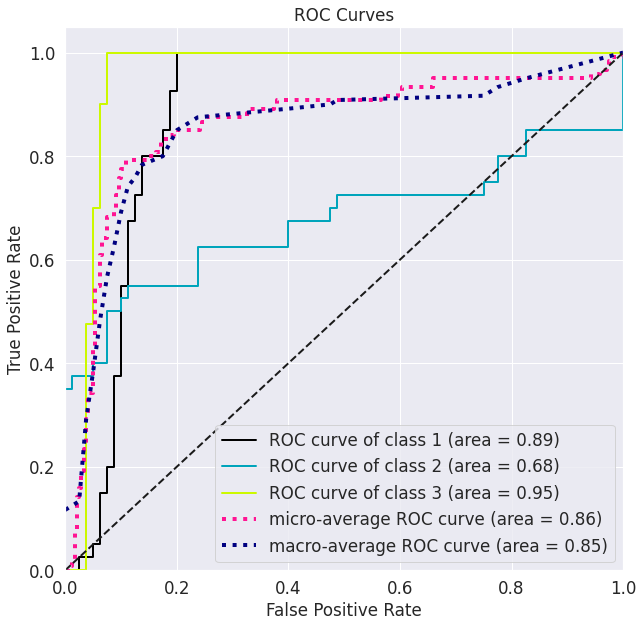

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


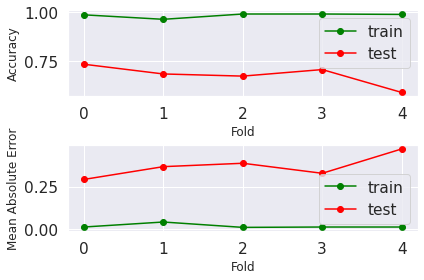

                            precision  \
0  [[0.7435897435897436, 0.2, 0.825]]   
1  [[0.7435897435897436, 0.2, 0.825]]   
2  [[0.7435897435897436, 0.2, 0.825]]   
3  [[0.7435897435897436, 0.2, 0.825]]   
4  [[0.7435897435897436, 0.2, 0.825]]   

                                              recall  \
0  [[0.6744186046511628, 0.4444444444444444, 0.56...   
1  [[0.6744186046511628, 0.4444444444444444, 0.56...   
2  [[0.6744186046511628, 0.4444444444444444, 0.56...   
3  [[0.6744186046511628, 0.4444444444444444, 0.56...   
4  [[0.6744186046511628, 0.4444444444444444, 0.56...   

                                                  f1              accuracy  \
0  [[0.7073170731707318, 0.2758620689655173, 0.67...  [0.5882352941176471]   
1  [[0.7073170731707318, 0.2758620689655173, 0.67...  [0.5882352941176471]   
2  [[0.7073170731707318, 0.2758620689655173, 0.67...  [0.5882352941176471]   
3  [[0.7073170731707318, 0.2758620689655173, 0.67...  [0.5882352941176471]   
4  [[0.7073170731707318, 0

In [ ]:
# PCA_ANOVA_LR
pca_vt_knn  = Pipeline(steps=[('processor',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', FastICA(n_components=200)),
                                                ('vt',SelectPercentile(f_classif,percentile=80))
                                                ])),
                ('classifier',
                 LinearDiscriminantAnalysis())])

combination_measurement(pipeline = pca_vt_knn)

ica_sp_GB_validation = Validation( pca_vt_knn)
ica_sp_GB_validation.FitAndPrediction()

## With Reduction

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=0.5)

DT_piplines={}
for processor_name, processor in std_FE_FS.items():
      pipeline = Pipeline(steps=[(processor_name, processor),
                                ("DT", DT)])

      pipeline_name = processor_name + '_' + 'DT'

      DT_piplines[pipeline_name] = pipeline

results_df = predictionReport(pipelines=DT_piplines)

KeyboardInterrupt: ignored

# RF + PCA

In [ ]:
pca_rf = Pipeline(steps=[
    ('preprocess',FeatureUnion(transformer_list=[
                                                ('pca', PCA(n_components=0.99))
                                                ])),
    ('classifier', RandomForestClassifier())
    ])
pca_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'classifier', 'preprocess__n_jobs', 'preprocess__transformer_list', 'preprocess__transformer_weights', 'preprocess__verbose', 'preprocess__pca', 'preprocess__pca__copy', 'preprocess__pca__iterated_power', 'preprocess__pca__n_components', 'preprocess__pca__random_state', 'preprocess__pca__svd_solver', 'preprocess__pca__tol', 'preprocess__pca__whiten', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [ ]:
param_grid = {'classifier__bootstrap': [True],
              'classifier__max_depth': [20,25,30,35,40,45,50],
              'classifier__min_samples_leaf':  [0.05],              # (0.0 to 0.5],
              'classifier__min_samples_split': [0.05],              # (0.0 to 1.0],
              'classifier__n_estimators': [25,30,35,40,50,55,60,70,80],

              }

pca_rf_RandomSearch = RandomSearch(X_train,y_train,pca_rf, param_grid)

Prediction_pca_rf = pca_rf_RandomSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_pca_rf).mean(),7))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 63 is smaller than n_iter=100. Running 63 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best: 0.608465 using {'classifier__n_estimators': 80, 'classifier__min_samples_split': 0.05, 'classifier__min_samples_leaf': 0.05, 'classifier__max_depth': 40, 'classifier__bootstrap': True}
prediction on test set is: 0.7916667


477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


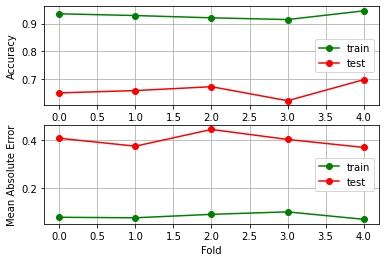

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


precision  \
0  [[0.5128205128205128, 0.65, 0.75]]   
1  [[0.5128205128205128, 0.65, 0.75]]   
2  [[0.5128205128205128, 0.65, 0.75]]   
3  [[0.5128205128205128, 0.65, 0.75]]   
4  [[0.5128205128205128, 0.65, 0.75]]   

                                              recall  \
0  [[0.6451612903225806, 0.5909090909090909, 0.68...   
1  [[0.6451612903225806, 0.5909090909090909, 0.68...   
2  [[0.6451612903225806, 0.5909090909090909, 0.68...   
3  [[0.6451612903225806, 0.5909090909090909, 0.68...   
4  [[0.6451612903225806, 0.5909090909090909, 0.68...   

                                                  f1              accuracy  \
0  [[0.5714285714285714, 0.6190476190476191, 0.71...  [0.6386554621848739]   
1  [[0.5714285714285714, 0.6190476190476191, 0.71...  [0.6386554621848739]   
2  [[0.5714285714285714, 0.6190476190476191, 0.71...  [0.6386554621848739]   
3  [[0.5714285714285714, 0.6190476190476191, 0.71...  [0.6386554621848739]   
4  [[0.5714285714285714, 0.6190476190476191, 0.71...  [0.6386554621848739]   

                                                  cf                  MAE  
0  [[[[69 19], [11 20]], [[61 14], [18 26]], [[65...  [0.453781512605042]  
1  [[[[69 19], [11 20]], [[61 14], [18 26]], [[65...  [0.453781512605042]  
2  [[[[69 19], [11 20]], [[61 14], [18 26]], [[65...  [0.453781512605042]  
3  [[[[69 19], [11 20]], [[61 14], [18 26]], [[65...  [0.453781512605042]  
4  [[[[69 19], [11 20]], [[61 14], [18 26]], [[65...  [0.453781512605042]

In [ ]:
pca_rf = Pipeline(steps=[
    ('preprocess',FeatureUnion(transformer_list=[
                                                ('pca', PCA(n_components=0.99))
                                                ])),
    ('classifier', RandomForestClassifier(n_estimators= 80, min_samples_split=0.05,
                                          min_samples_leaf= 0.05, max_depth= 40,
                                          bootstrap= True))
    ])

PCA_RF_Validation =  Validation(pca_rf)
PCA_RF_Validation.PlotLearningAndErrorCurve(pca_rf)
PCA_RF_Validation.PredictionPerformance(pca_rf)

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


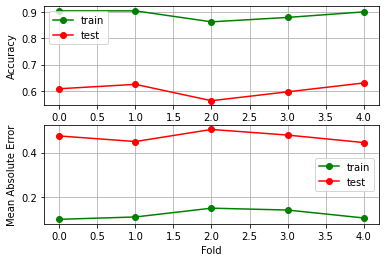

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


precision  \
0  [[0.5128205128205128, 0.45, 0.825]]   
1  [[0.5128205128205128, 0.45, 0.825]]   
2  [[0.5128205128205128, 0.45, 0.825]]   
3  [[0.5128205128205128, 0.45, 0.825]]   
4  [[0.5128205128205128, 0.45, 0.825]]   

                                             recall  \
0  [[0.5, 0.47368421052631576, 0.8048780487804879]]   
1  [[0.5, 0.47368421052631576, 0.8048780487804879]]   
2  [[0.5, 0.47368421052631576, 0.8048780487804879]]   
3  [[0.5, 0.47368421052631576, 0.8048780487804879]]   
4  [[0.5, 0.47368421052631576, 0.8048780487804879]]   

                                                  f1              accuracy  \
0  [[0.5063291139240506, 0.46153846153846156, 0.8...  [0.5966386554621849]   
1  [[0.5063291139240506, 0.46153846153846156, 0.8...  [0.5966386554621849]   
2  [[0.5063291139240506, 0.46153846153846156, 0.8...  [0.5966386554621849]   
3  [[0.5063291139240506, 0.46153846153846156, 0.8...  [0.5966386554621849]   
4  [[0.5063291139240506, 0.46153846153846156, 0.8...  [0.5966386554621849]   

                                                  cf                  MAE  
0  [[[[60 19], [20 20]], [[59 22], [20 18]], [[71...  [0.453781512605042]  
1  [[[[60 19], [20 20]], [[59 22], [20 18]], [[71...  [0.453781512605042]  
2  [[[[60 19], [20 20]], [[59 22], [20 18]], [[71...  [0.453781512605042]  
3  [[[[60 19], [20 20]], [[59 22], [20 18]], [[71...  [0.453781512605042]  
4  [[[[60 19], [20 20]], [[59 22], [20 18]], [[71...  [0.453781512605042]

In [ ]:
pca_vt_rf = Pipeline(steps=[
    ('preprocess',FeatureUnion(transformer_list=[
                                                ('pca', PCA(n_components=0.85)),
                                                 ('vt',VarianceThreshold(threshold=85))
                                                ])),
    ('classifier', RandomForestClassifier(n_estimators= 90, min_samples_split=0.05,
                                          min_samples_leaf= 0.05, max_depth= 80,
                                          bootstrap= True))
    ])

PCA_VT_RF_Validation =  Validation(pca_vt_rf)
PCA_VT_RF_Validation.PlotLearningAndErrorCurve(pca_vt_rf)
PCA_VT_RF_Validation.PredictionPerformance(pca_vt_rf)

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


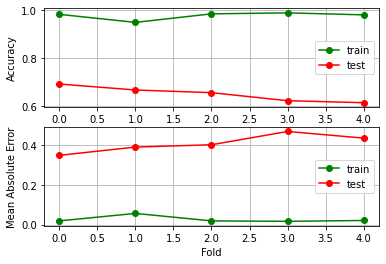

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


precision  \
0  [[0.7435897435897436, 0.275, 0.825]]   
1  [[0.7435897435897436, 0.275, 0.825]]   
2  [[0.7435897435897436, 0.275, 0.825]]   
3  [[0.7435897435897436, 0.275, 0.825]]   
4  [[0.7435897435897436, 0.275, 0.825]]   

                                            recall  \
0  [[0.8055555555555556, 0.5, 0.5409836065573771]]   
1  [[0.8055555555555556, 0.5, 0.5409836065573771]]   
2  [[0.8055555555555556, 0.5, 0.5409836065573771]]   
3  [[0.8055555555555556, 0.5, 0.5409836065573771]]   
4  [[0.8055555555555556, 0.5, 0.5409836065573771]]   

                                                  f1              accuracy  \
0  [[0.7733333333333334, 0.3548387096774194, 0.65...  [0.6134453781512605]   
1  [[0.7733333333333334, 0.3548387096774194, 0.65...  [0.6134453781512605]   
2  [[0.7733333333333334, 0.3548387096774194, 0.65...  [0.6134453781512605]   
3  [[0.7733333333333334, 0.3548387096774194, 0.65...  [0.6134453781512605]   
4  [[0.7733333333333334, 0.3548387096774194, 0.65...  [0.6134453781512605]   

                                                  cf                   MAE  
0  [[[[73 10], [ 7 29]], [[68 29], [11 11]], [[51...  [0.4369747899159664]  
1  [[[[73 10], [ 7 29]], [[68 29], [11 11]], [[51...  [0.4369747899159664]  
2  [[[[73 10], [ 7 29]], [[68 29], [11 11]], [[51...  [0.4369747899159664]  
3  [[[[73 10], [ 7 29]], [[68 29], [11 11]], [[51...  [0.4369747899159664]  
4  [[[[73 10], [ 7 29]], [[68 29], [11 11]], [[51...  [0.4369747899159664]

In [ ]:
pca_vt_rf = Pipeline(steps=[
    ('preprocess',FeatureUnion(transformer_list=[
                                                ('lda', LinearDiscriminantAnalysis(n_components=2)),
                                                 #('sp',SelectPercentile(percentile=80))
                                                ])),
    ('classifier', RandomForestClassifier(n_estimators= 90, min_samples_split=0.05,
                                          min_samples_leaf= 0.05, max_depth= 80,
                                          bootstrap= True))
    ])

PCA_VT_RF_Validation =  Validation(pca_vt_rf)
PCA_VT_RF_Validation.PlotLearningAndErrorCurve(pca_vt_rf)
PCA_VT_RF_Validation.PredictionPerformance(pca_vt_rf)

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


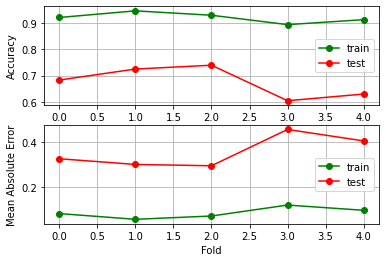

In [ ]:
pca_vt_rf = Pipeline(steps=[
    ('preprocess',FeatureUnion(transformer_list=[
                                                ('ica', FastICA(n_components=100)),
                                                 ('vt',VarianceThreshold(threshold=80))
                                                ])),
    ('classifier', RandomForestClassifier(n_estimators= 90, min_samples_split=0.05,
                                          min_samples_leaf= 0.05, max_depth= 80,
                                          bootstrap= True))
    ])

PCA_VT_RF_Validation =  Validation(pca_vt_rf)
PCA_VT_RF_Validation.PlotLearningAndErrorCurve(pca_vt_rf)

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


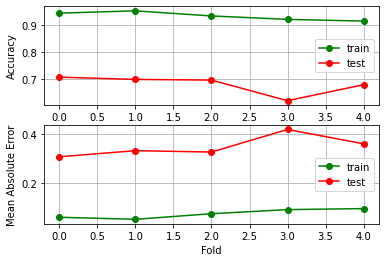

In [ ]:
pca_vt_rf = Pipeline(steps=[
    ('preprocess',FeatureUnion(transformer_list=[
                                                ('ica', FastICA(n_components=100)),
                                                 ('vt',VarianceThreshold(threshold=0.75))
                                                ])),
    ('classifier', RandomForestClassifier(n_estimators= 90, min_samples_split=0.05,
                                          min_samples_leaf= 0.05, max_depth= 80,
                                          bootstrap= True))
    ])

PCA_VT_RF_Validation =  Validation(pca_vt_rf)
PCA_VT_RF_Validation.PlotLearningAndErrorCurve(pca_vt_rf)

# Results

In [ ]:
results = pd.read_excel('/content/drive/MyDrive/Thesis/ Results of smote/SZ BD D/A Complete ML Pipeline Tutorial.xlsx')
results.head(3)

Unnamed: 0  Accuracy  f1_score  Precision  Recall  accuracy  f1_score.1  \
0  std_pca_vt_LR     75.00     71.91      78.27   75.00  0.750000    0.719066   
1  std_pca_sp_LR     78.33     74.74      83.94   78.33  0.783333    0.747379   
2  std_ica_vt_LR     74.17     71.35      76.76   74.17  0.741667    0.713491   

   precision_score  recall_score  
0         0.782738      0.750000  
1         0.839360      0.783333  
2         0.767645      0.741667

In [ ]:
name = results['Unnamed: 0']
each = name[0:4].str.split(pat='_')
fe = each[1]; fs = each[2]; c = each[3]
print(c)

['std', 'ica', 'sp', 'LR']


In [ ]:
each[1]

['std', 'pca', 'sp', 'LR']